In [105]:
import numpy as np
from scipy import sparse
import pandas as pd
import hictoolbox
import matplotlib.pyplot as plt

In [106]:
R=100000
NbmaxEpi=15 #Epi states go from 0 to 15
alpha=0.227
selectedmark=1 #index of the selected mark
HiCfilename='data/chr1_100kb.RAWobserved'

# loading matrix
A=np.loadtxt(HiCfilename)
A=np.int_(A)
print('Input data shape : ',np.shape(A))
A=np.concatenate((A,np.transpose(np.array([A[:,1],A[:,0],A[:,2]]))), axis=0)#build array at pb resolution
A = sparse.coo_matrix( (A[:,2], (A[:,0],A[:,1])))
binned_map=hictoolbox.bin2d(A,R,R) #!become csr sparse array
LENTEST=np.shape(A)[0]
print('Input at the good resolution : ',np.shape(binned_map))

del A #keep space

filtered_map, binsaved = hictoolbox.filteramat(binned_map)
D = hictoolbox.SCN(filtered_map)
D = hictoolbox.observed_expected(D)
D = np.corrcoef(D)

Input data shape :  (2435300, 3)
Input at the good resolution :  (2493, 2493)


In [3]:
epi = np.load('data/Epi1.npy')

In [4]:
print(epi.shape)
epi

(2053, 15)


array([[0.044  , 0.     , 0.     , ..., 0.     , 0.03   , 0.49   ],
       [0.02   , 0.014  , 0.002  , ..., 0.024  , 0.39   , 0.21799],
       [0.048  , 0.078  , 0.     , ..., 0.014  , 0.06   , 0.35   ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 1.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 1.     ],
       [0.01   , 0.02801, 0.     , ..., 0.     , 0.     , 0.80399]])

In [5]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1)
res = pca.fit_transform(D)
comps = res>0
comps = comps.flatten()

In [15]:
epiA = epi[comps==0]
epiB = epi[comps==1]

In [5]:
labels = ['TssA', 'TssAFlnk', 'TxFlnk', 'Tx', 'TxWk', 'EnhG', 'Enh', 'ZNF/Rpts', 
          'Het', 'TssBiv', 'BivFlnk', 'EnhBiv', 'ReprPC', 'ReprPCWk', 'Quies']
colors = [(255,0,0), (255,69,0), (50,205,50), (0,128,0), (0,100,0), (194,225,5),
          (255,255,0), (102,205,170), (138,145,208), (205,92,92), (233,150,122),
          (189,183,107), (128,128,128), (192,192,192), (255,255,255)]
for i in range(15):
    colors[i] = (colors[i][0]/255, colors[i][1]/255, colors[i][2]/255)
coverages = [0.7, 0.5, 0.1, 3.6, 11.6, 0.4, 2.8, 0.2, 2.6, 0.1, 0.1, 0.1, 1.2, 8.3, 67.8]
coverages = np.array([c/100 for c in coverages])

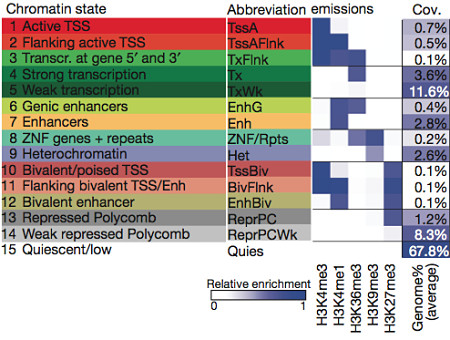

Each state has a characteristic histone pattern and can be roughly classified as either active (the first 8) or repressed. Looking at coverage, we can see that for any given epigenome, the majority of bases (68%) lack any histone marks, suggesting a quiescent (low activity) state. However, a significant fraction bore marks of active chromatin, including ~5% that appear to be active promoters or enhancers. Another important histone modification is acetylation (ac), which is the addition of an acetyl group to a lysine residue. A subset of the epigenomes were therefore profiled for H3K27ac and H3K9ac, which mark increased activation of enhancer and promoter regions.

http://massgenomics.org/2015/04/the-human-epigenome-roadmap.html

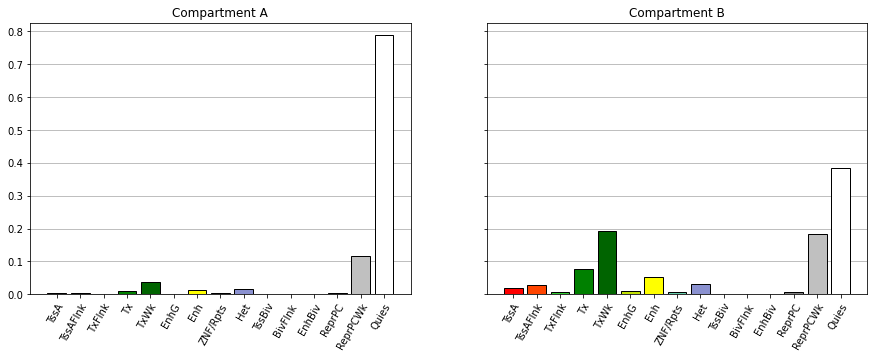

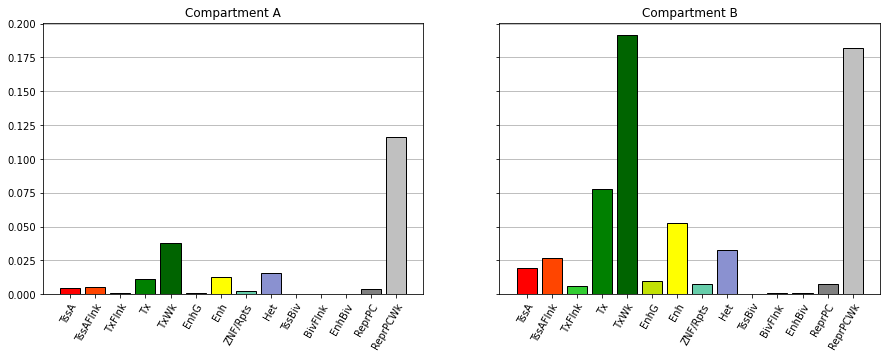

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
axes[0].bar(range(15), np.mean(epiA, axis=0), color=colors, edgecolor='k')
axes[0].set_xticks(range(15))
axes[0].set_xticklabels(labels, rotation=60, ha='right', rotation_mode='anchor')
axes[0].set_axisbelow(True)
axes[0].grid(True, axis='y')
axes[0].set_title('Compartment A')
axes[1].bar(range(15), np.mean(epiB, axis=0), color=colors, edgecolor='k')
axes[1].set_xticks(range(15))
axes[1].set_xticklabels(labels, rotation=60, ha='right', rotation_mode='anchor')
axes[1].set_axisbelow(True)
axes[1].grid(True, axis='y')
axes[1].set_title('Compartment B')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)
axes[0].bar(range(14), np.mean(epiA, axis=0)[:-1], color=colors[:-1], edgecolor='k')
axes[0].set_xticks(range(14))
axes[0].set_xticklabels(labels[:-1], rotation=60, ha='right', rotation_mode='anchor')
axes[0].set_axisbelow(True)
axes[0].grid(True, axis='y')
axes[0].set_title('Compartment A')
axes[1].bar(range(14), np.mean(epiB, axis=0)[:-1], color=colors[:-1], edgecolor='k')
axes[1].set_xticks(range(14))
axes[1].set_xticklabels(labels[:-1], rotation=60, ha='right', rotation_mode='anchor')
axes[1].set_axisbelow(True)
axes[1].grid(True, axis='y')
axes[1].set_title('Compartment B')
plt.show()

In [90]:
with open('data/chr1_compartiment.txt') as f:
    true_labels = f.readlines()
true_labels = [int(float(i.strip())) for i in true_labels]
true_labels = np.array(true_labels)

In [100]:
print(np.sum(true_labels[binsaved-1]==1))
print(np.sum(true_labels[binsaved-1]==0))
print(np.sum(true_labels[binsaved-1]==-1))

1035
994
24


In [102]:
np.where(true_labels[binsaved-1]==-1)

(array([203, 624, 647, 648, 650, 653, 654, 657, 658, 659, 725, 728, 756,
        946, 948, 949, 950, 951, 962, 966, 967, 969, 970, 973]),)

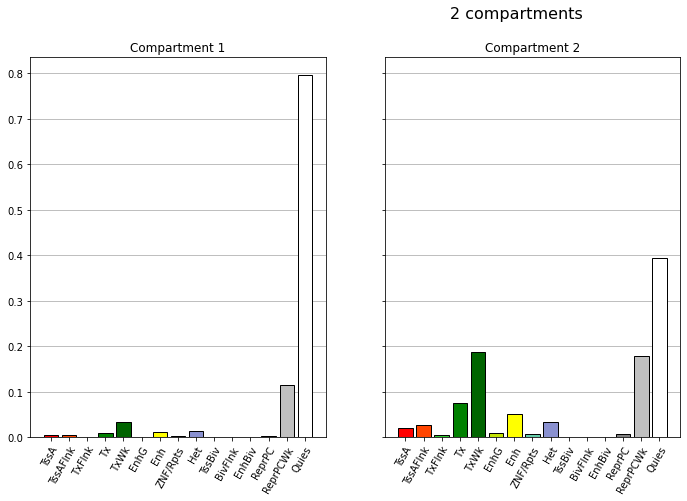

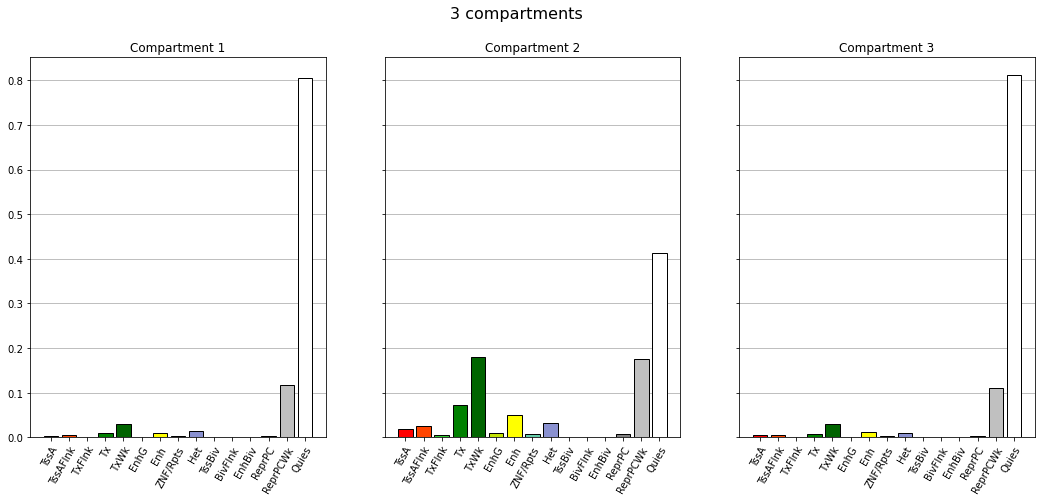

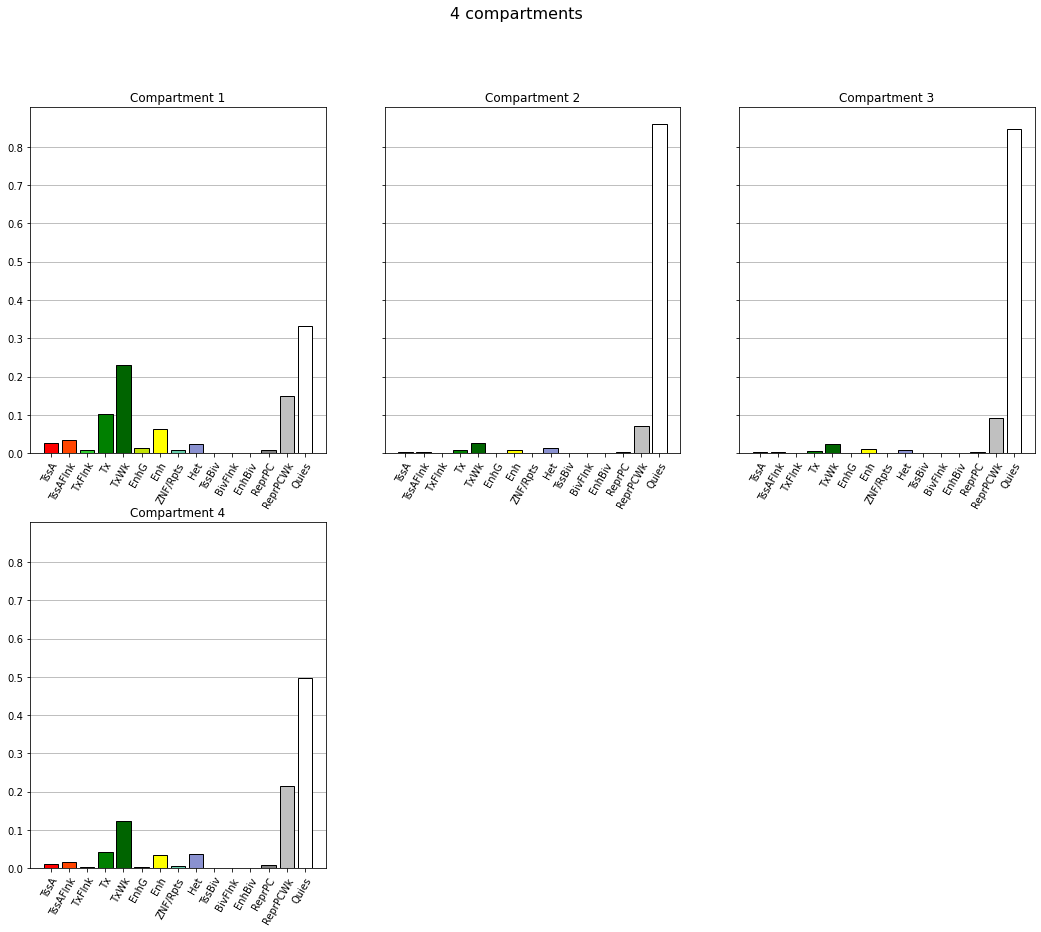

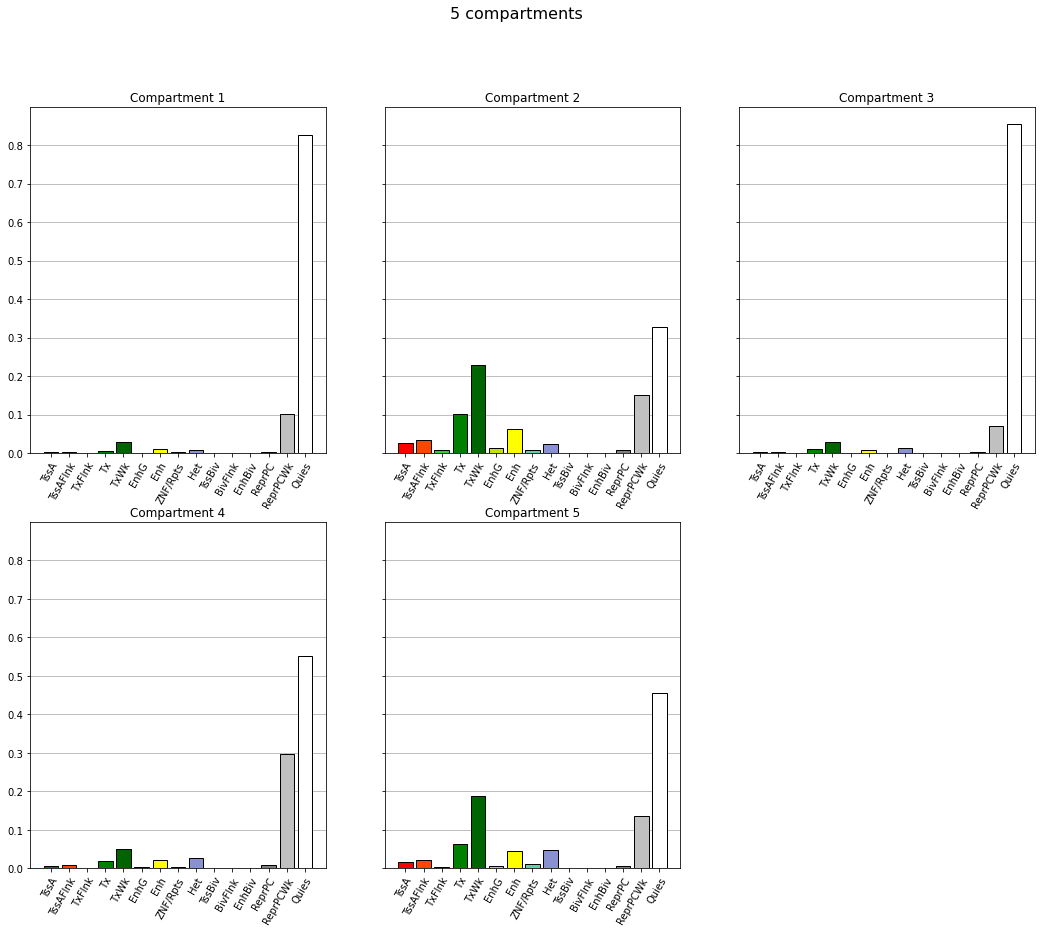

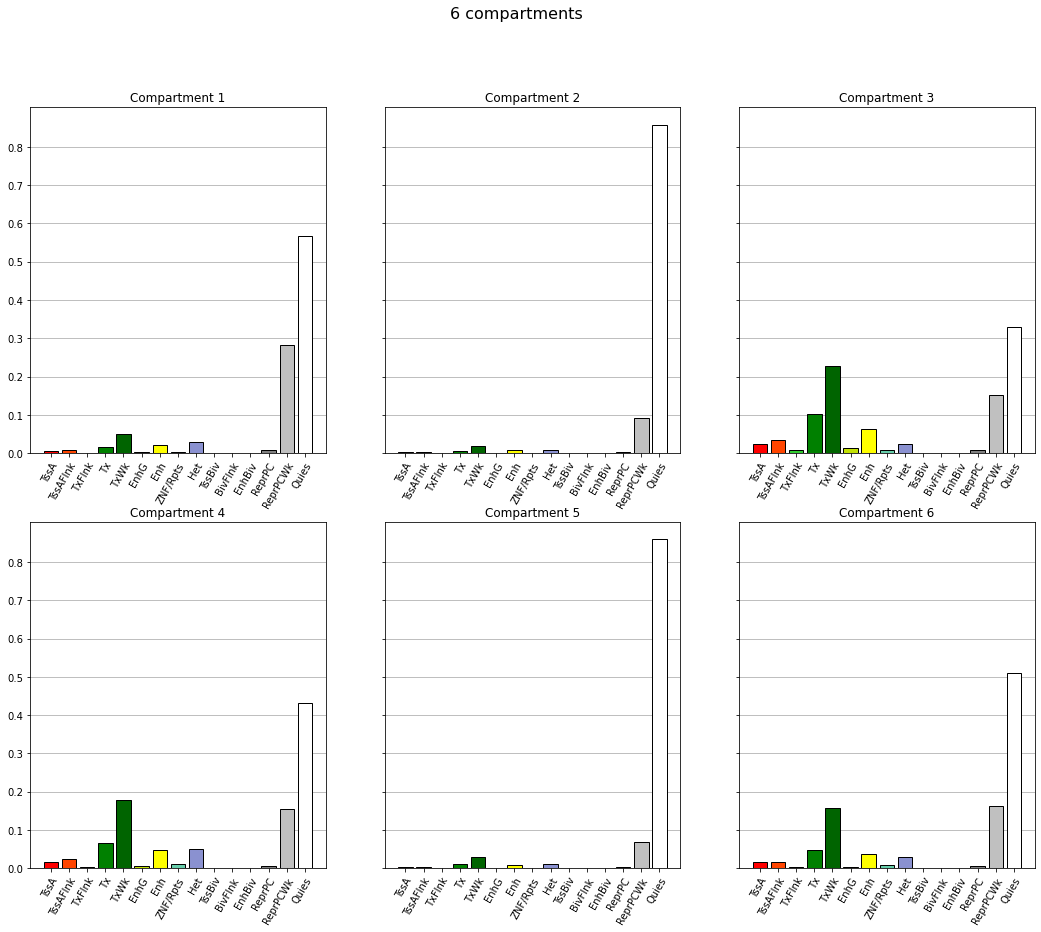

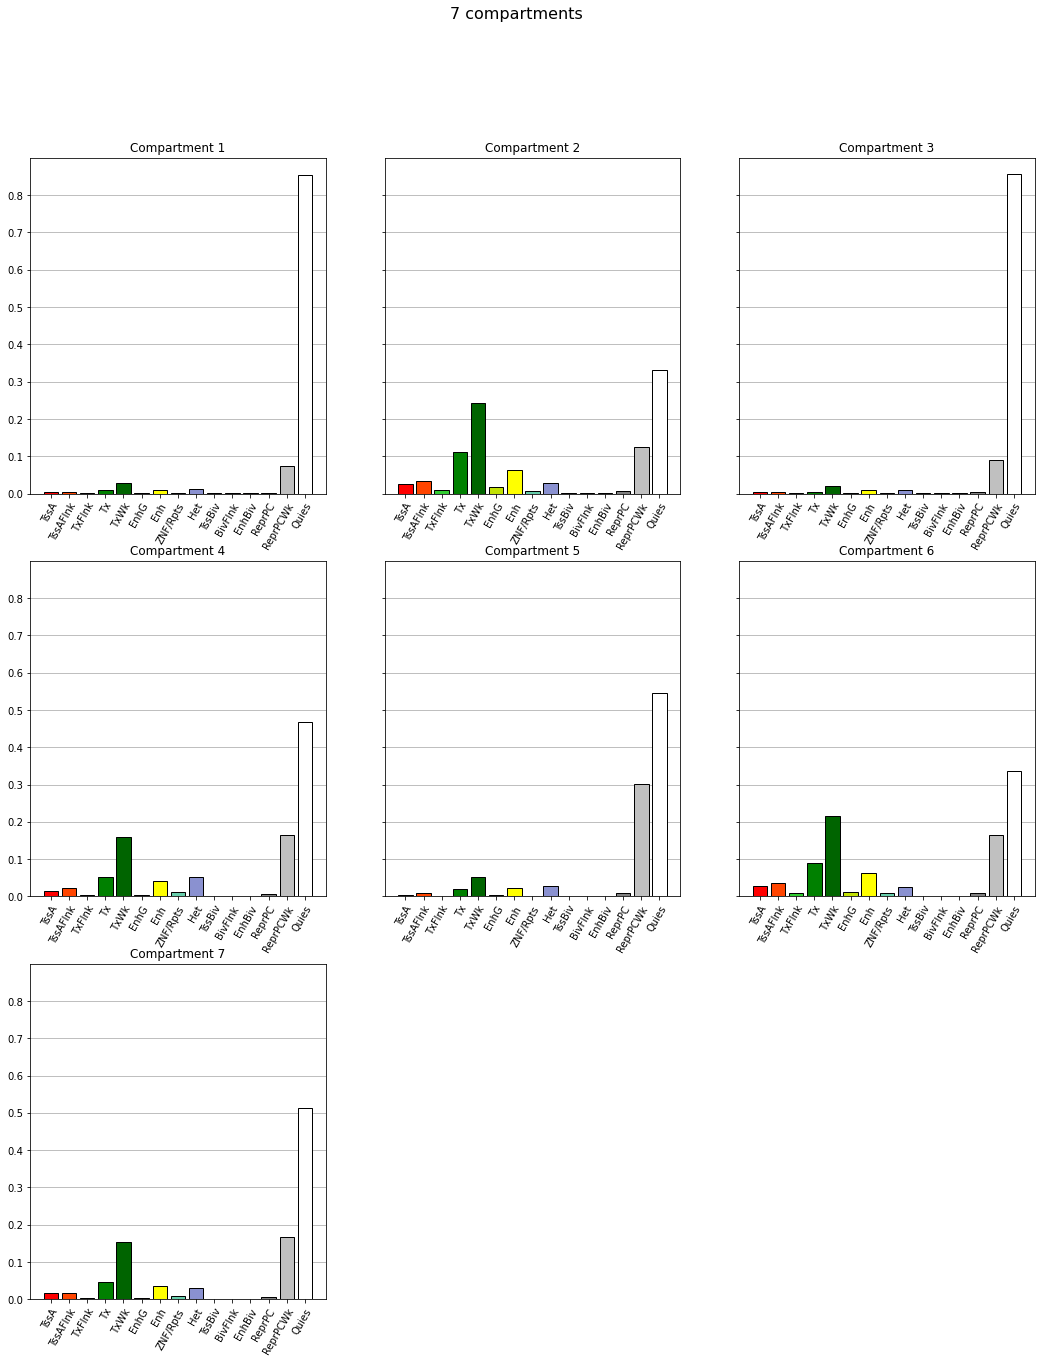

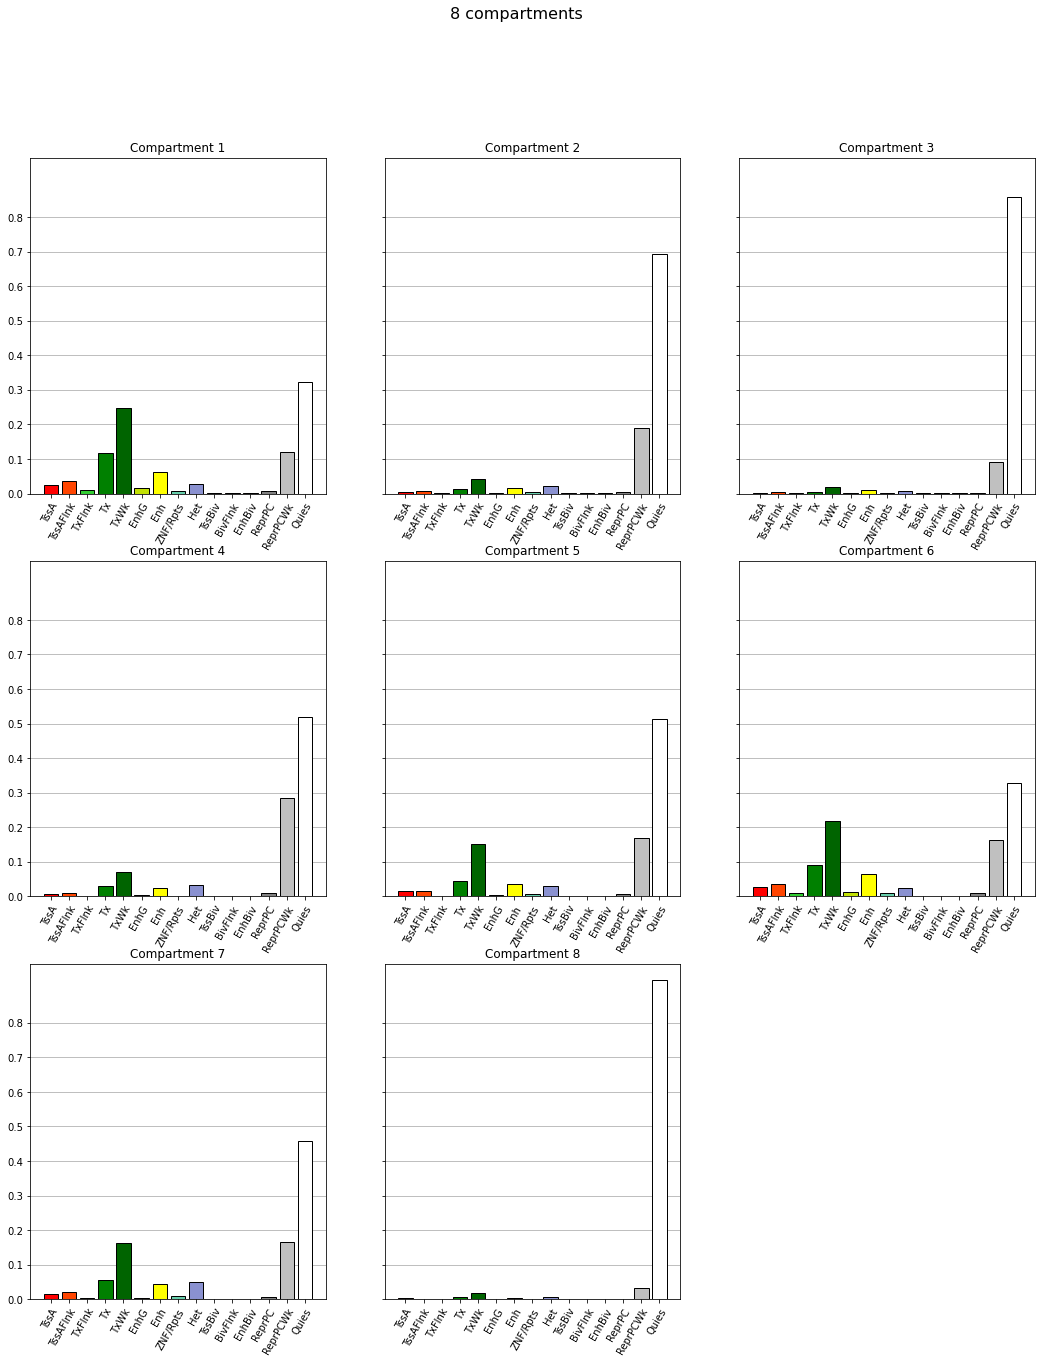

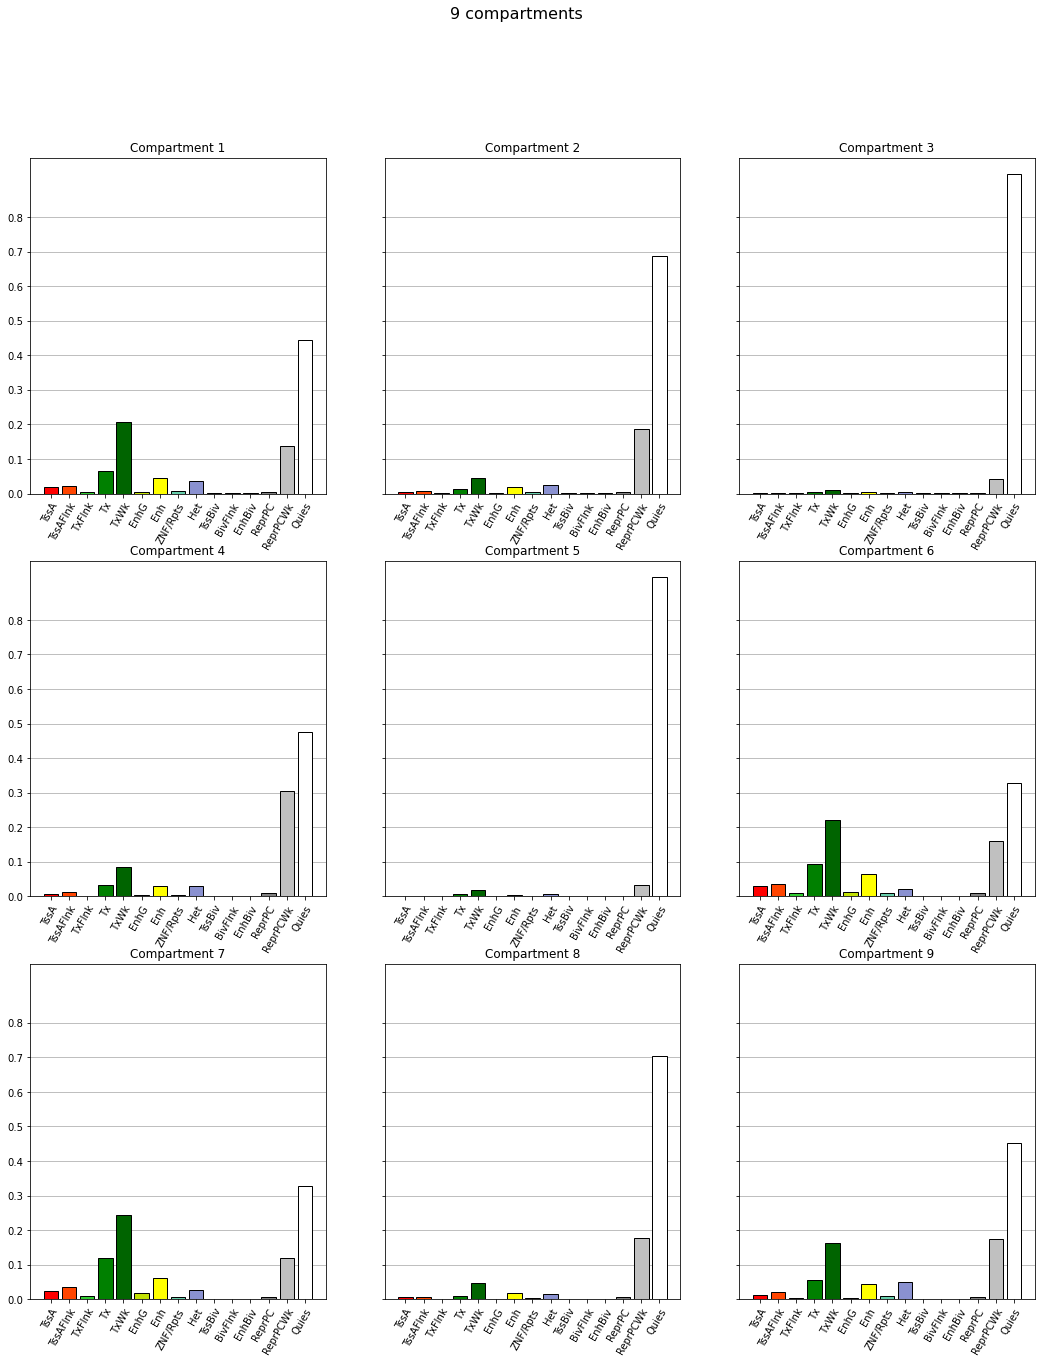

In [33]:
for c in range(2, 10):
    comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=c)[1]
    rows = int(np.ceil(c/3))
    fig, axes = plt.subplots(rows, 3, figsize=(18,rows*7), sharey=True)
    axes = axes.reshape(rows,3)
    k = 0
    for i in range(rows):
        for j in range(3):
            axes[i,j].bar(range(15), np.mean(epi[comps==k], axis=0), color=colors, edgecolor='k')
            axes[i,j].set_xticks(range(15))
            axes[i,j].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
            axes[i,j].set_xticklabels(labels, rotation=60, ha='right', rotation_mode='anchor')
            axes[i,j].set_axisbelow(True)
            axes[i,j].grid(True, axis='y')
            axes[i,j].set_title('Compartment ' + str(k+1))
            k+=1
            if k==c:
                if c%3==1:
                    fig.delaxes(axes[i,1])
                    fig.delaxes(axes[i,2])
                elif c%3==2:
                    fig.delaxes(axes[i,2])
                break
    plt.suptitle(str(c) + ' compartments', size=16)
    plt.savefig('plots/epi_comps/'+str(c)+'comps.png', dpi=200, facecolor='white')

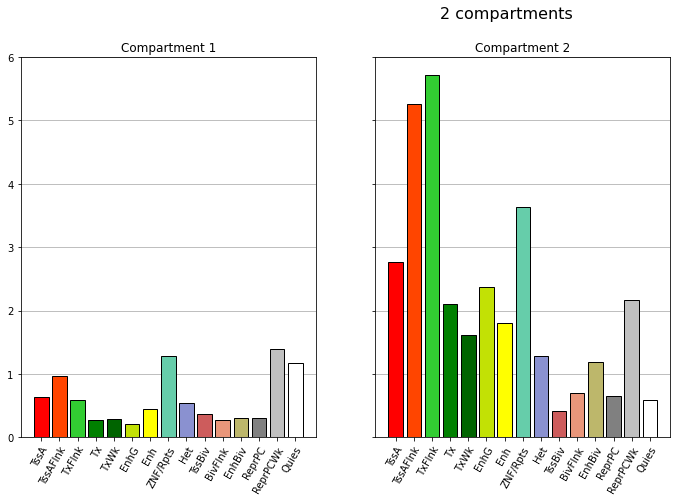

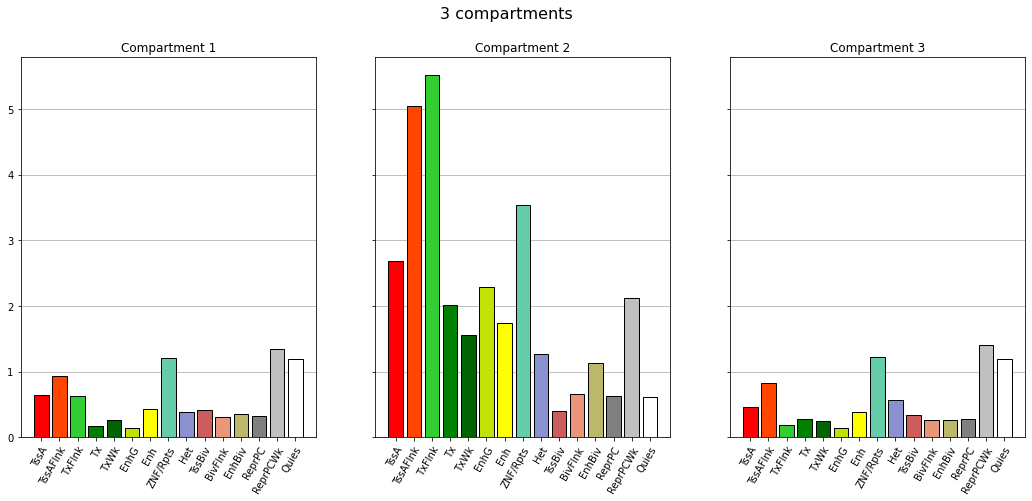

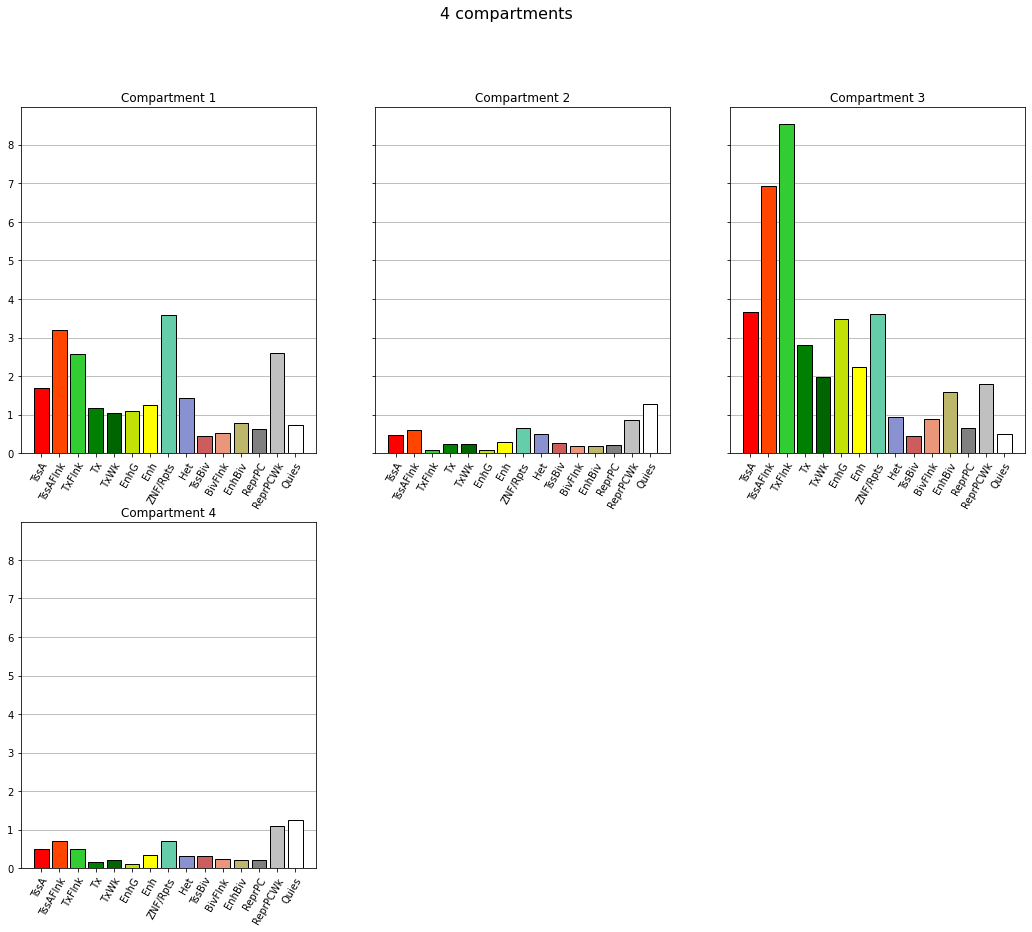

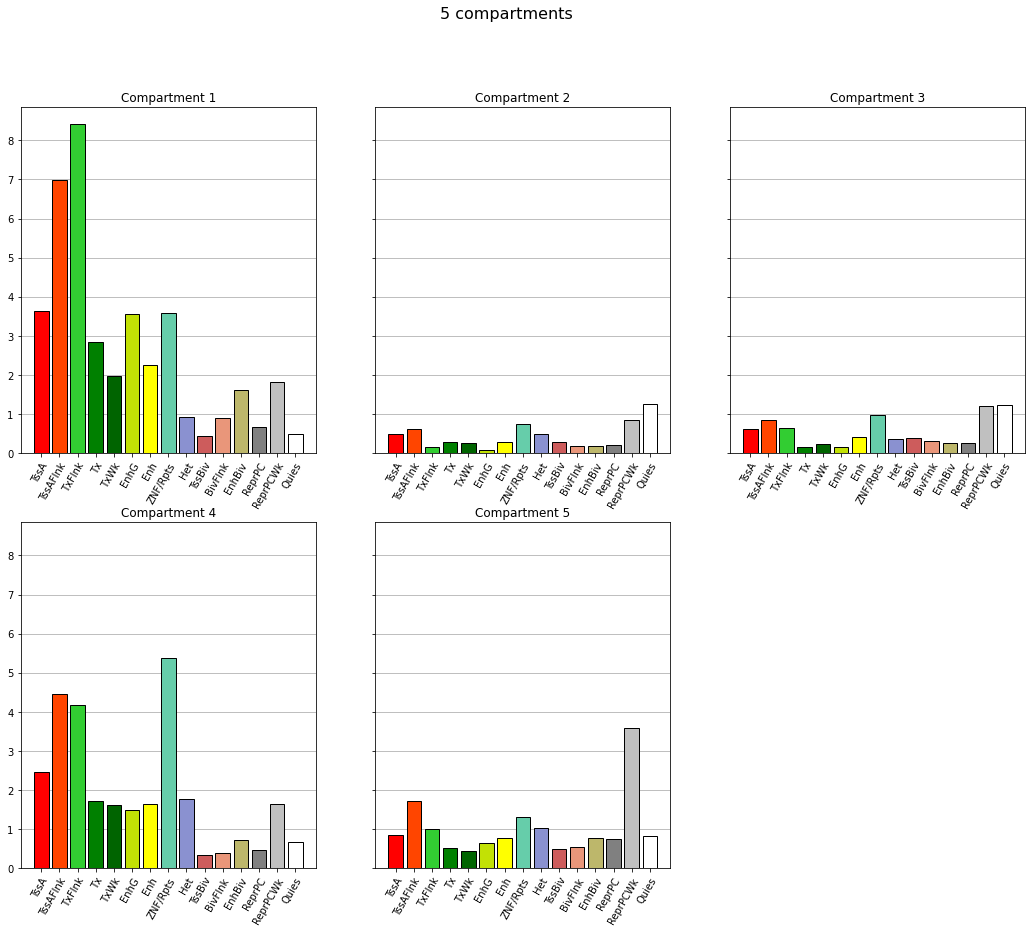

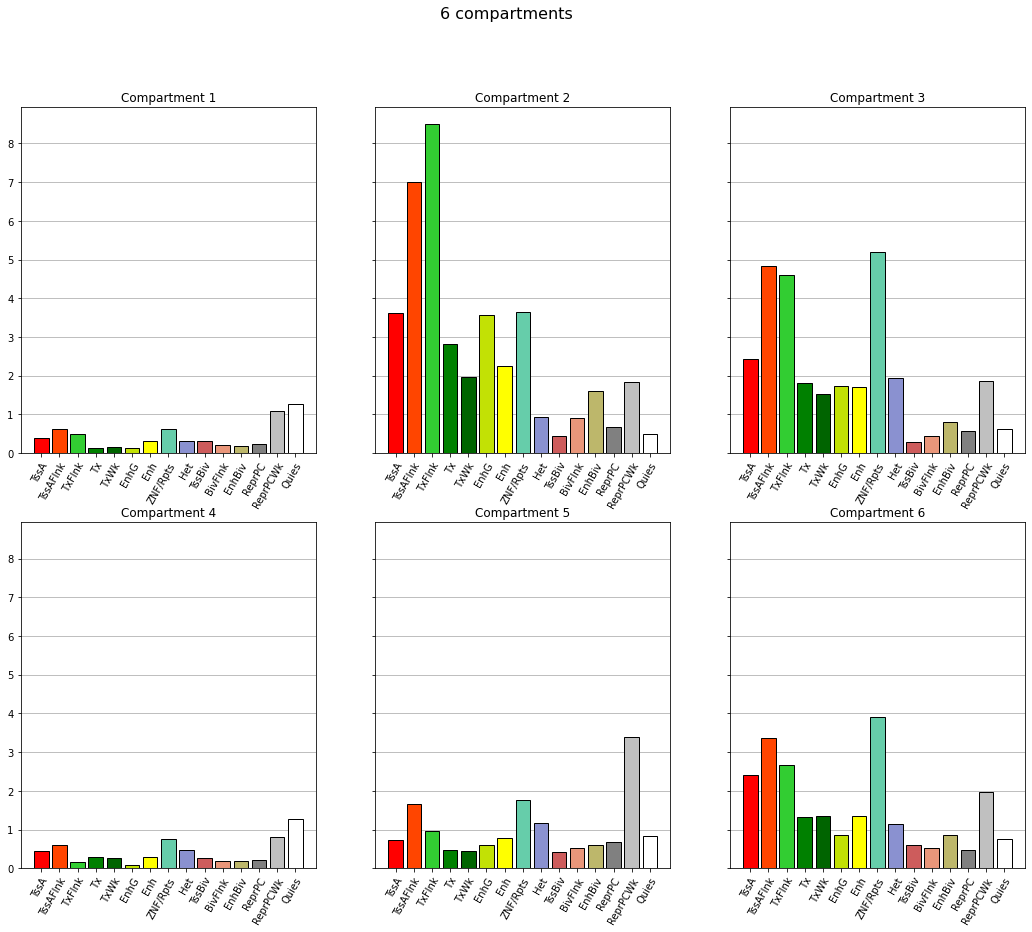

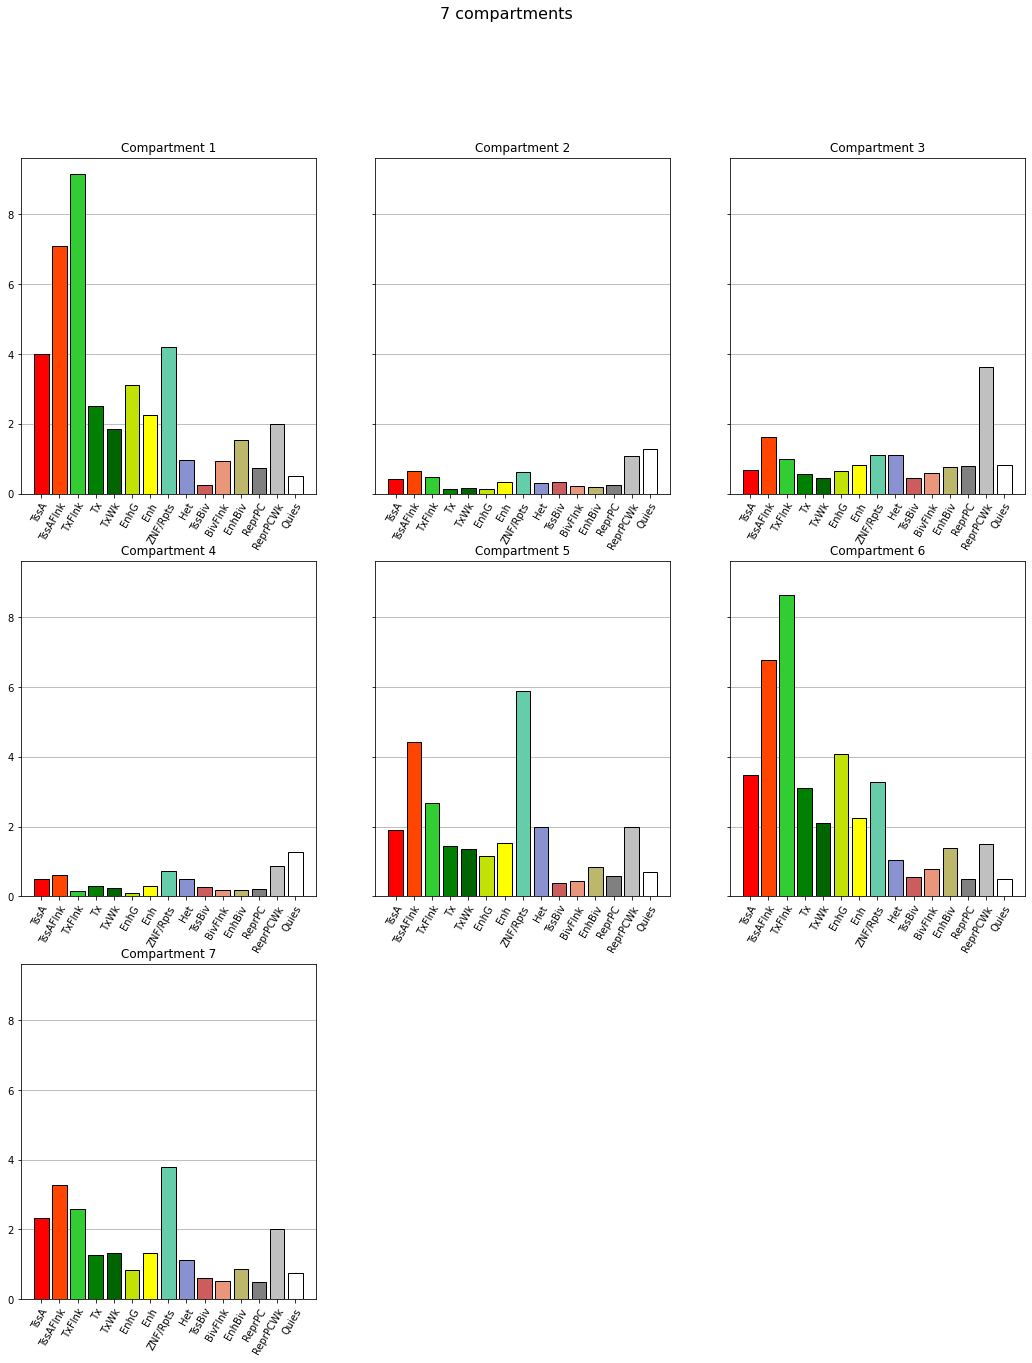

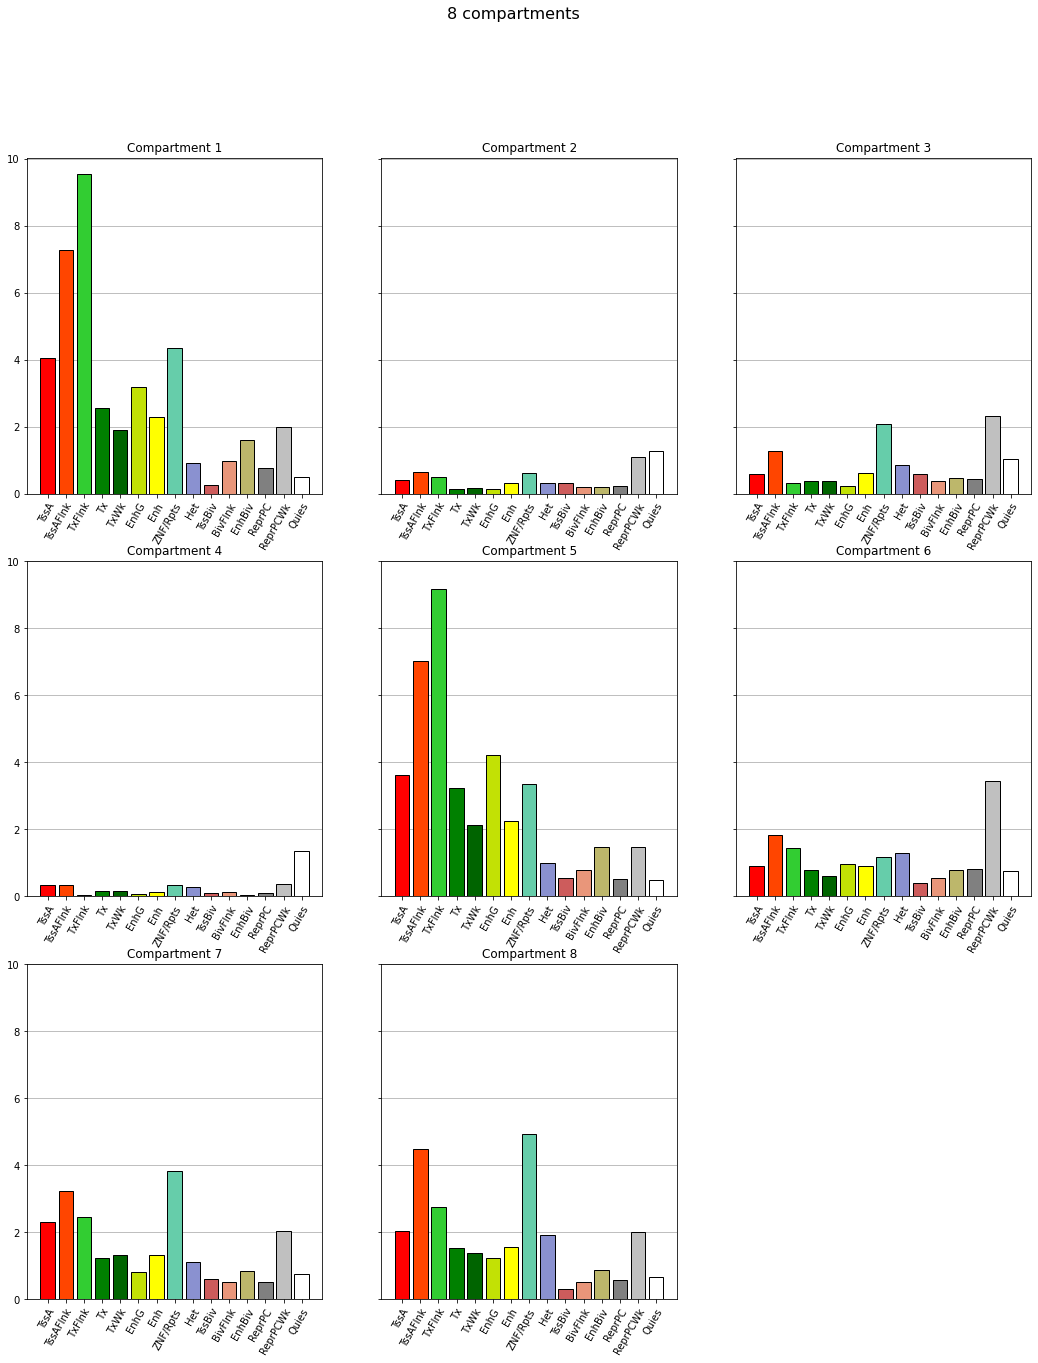

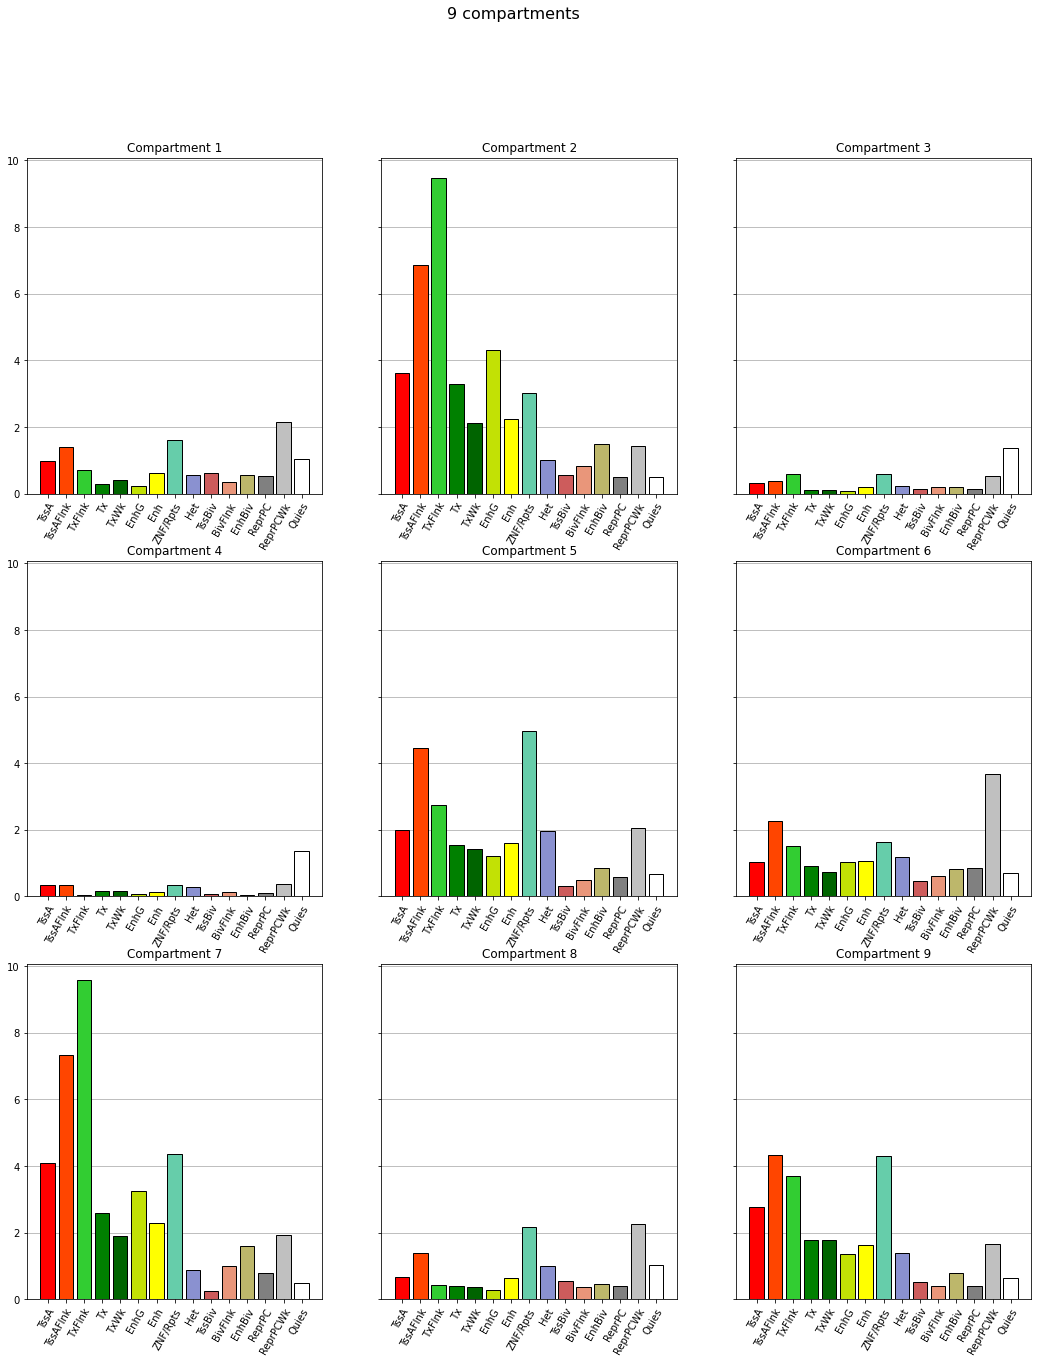

In [41]:
for c in range(2, 10):
    comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=c)[1]
    rows = int(np.ceil(c/3))
    fig, axes = plt.subplots(rows, 3, figsize=(18,rows*7), sharey=True)
    axes = axes.reshape(rows,3)
    k = 0
    for i in range(rows):
        for j in range(3):
            axes[i,j].bar(range(15), np.mean(epi[comps==k], axis=0)/coverages, color=colors, edgecolor='k')
            axes[i,j].set_xticks(range(15))
#             axes[i,j].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
            axes[i,j].set_xticklabels(labels, rotation=60, ha='right', rotation_mode='anchor')
            axes[i,j].set_axisbelow(True)
            axes[i,j].grid(True, axis='y')
            axes[i,j].set_title('Compartment ' + str(k+1))
            k+=1
            if k==c:
                if c%3==1:
                    fig.delaxes(axes[i,1])
                    fig.delaxes(axes[i,2])
                elif c%3==2:
                    fig.delaxes(axes[i,2])
                break
    plt.suptitle(str(c) + ' compartments', size=16)
    plt.savefig('plots/epi_comps_normalized/'+str(c)+'comps.png', dpi=200, facecolor='white')

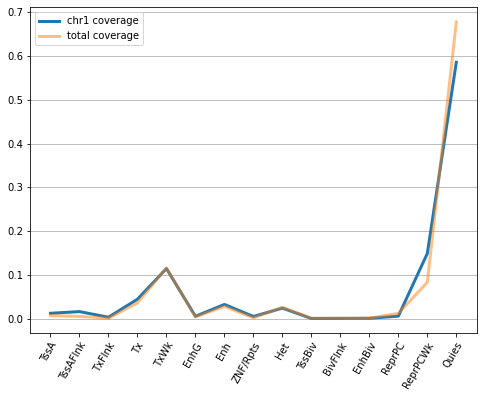

In [20]:
plt.figure(figsize=(8,6))
plt.plot(np.mean(epi, axis=0), linewidth=3, label='chr1 coverage')
plt.plot(coverages, linewidth=3, alpha=0.5, label='total coverage')
plt.xticks(range(len(labels)), labels, rotation=60, ha='right', rotation_mode='anchor')
plt.legend()
plt.grid(True, axis='y')
plt.show()

In [25]:
c = 2
comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=c)[1]
for k in range(c):
    markers = np.mean(epi[comps==k], axis=0)/coverages
    active = markers[:8]
    inactive = markers[8:]
    FC = np.mean(active) / np.mean(inactive)
    print(k, FC)

0 3.1748278909397887
1 0.9480839706798372


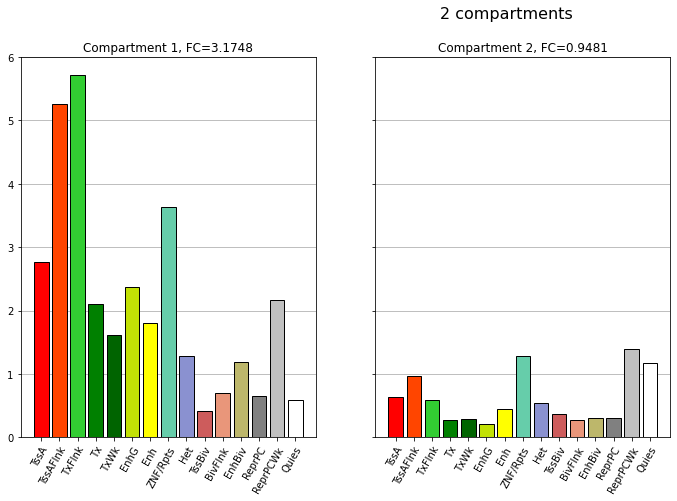

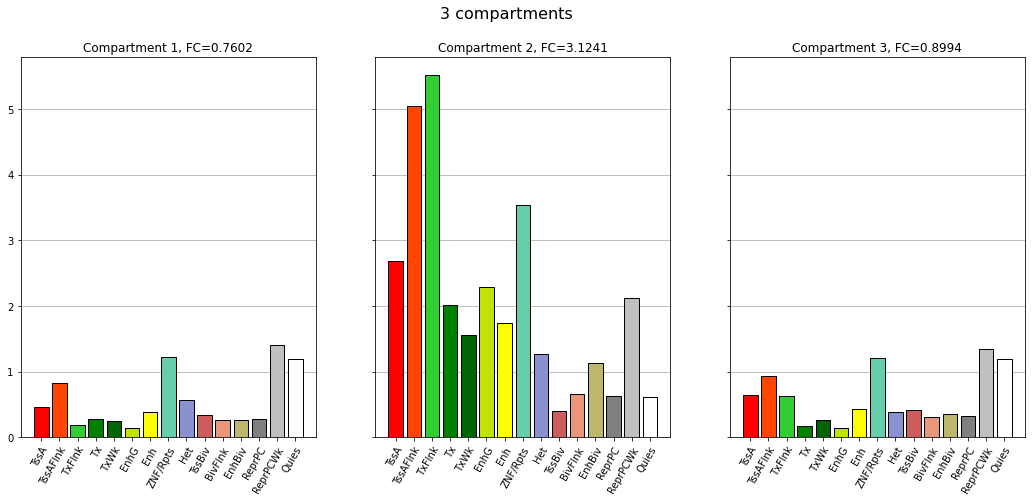

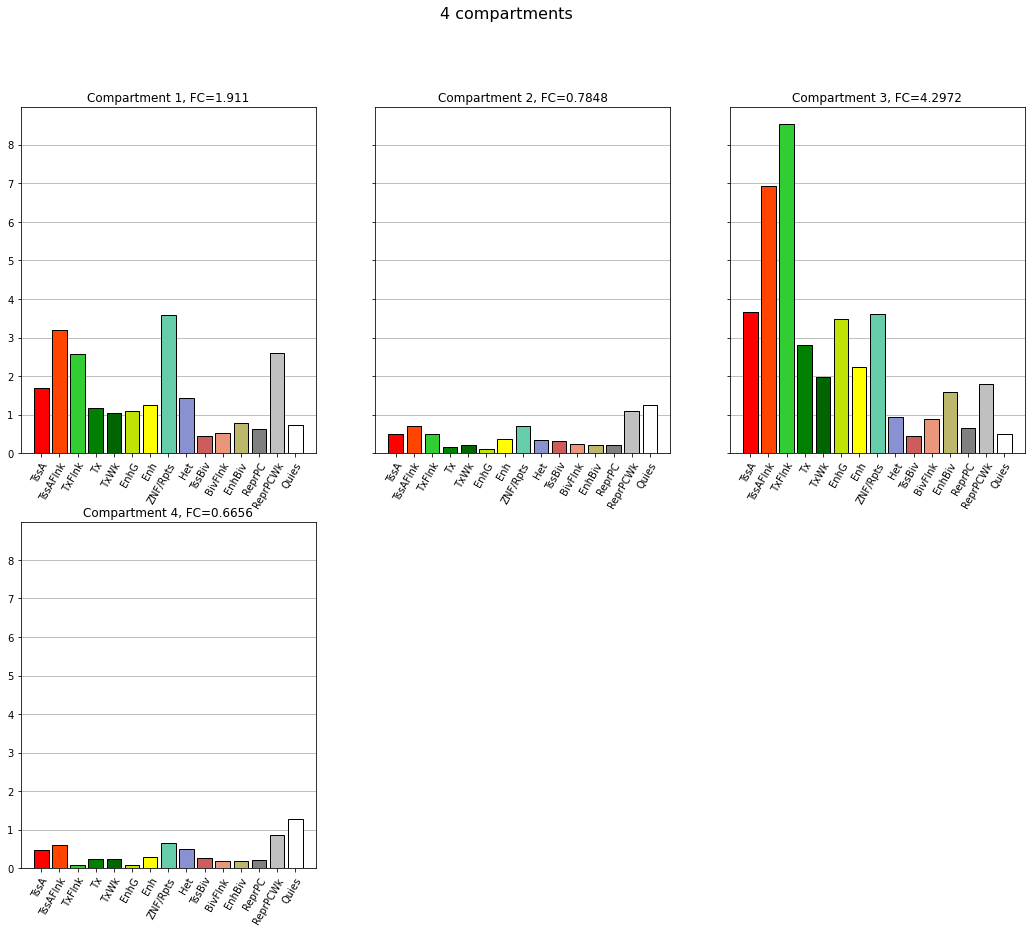

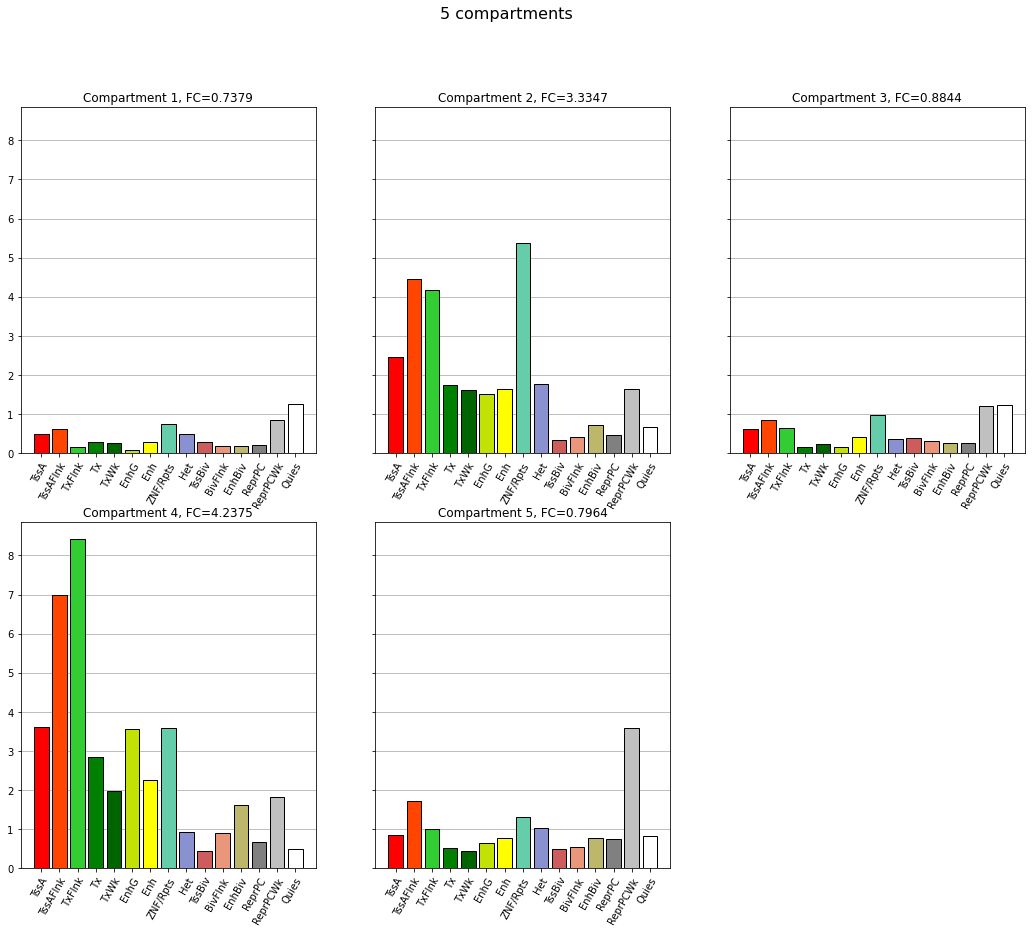

In [26]:
for c in range(2, 6):
    comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=c)[1]
    rows = int(np.ceil(c/3))
    fig, axes = plt.subplots(rows, 3, figsize=(18,rows*7), sharey=True)
    axes = axes.reshape(rows,3)
    k = 0
    for i in range(rows):
        for j in range(3):
            markers = np.mean(epi[comps==k], axis=0)/coverages
            active = markers[:8]
            inactive = markers[8:]
            FC = np.mean(active) / np.mean(inactive)
            axes[i,j].bar(range(15), markers, color=colors, edgecolor='k')
            axes[i,j].set_xticks(range(15))
            axes[i,j].set_xticklabels(labels, rotation=60, ha='right', rotation_mode='anchor')
            axes[i,j].set_axisbelow(True)
            axes[i,j].grid(True, axis='y')
            axes[i,j].set_title('Compartment ' + str(k+1) + ', FC='+str(np.round(FC, 4)))
            k+=1
            if k==c:
                if c%3==1:
                    fig.delaxes(axes[i,1])
                    fig.delaxes(axes[i,2])
                elif c%3==2:
                    fig.delaxes(axes[i,2])
                break
    plt.suptitle(str(c) + ' compartments', size=16)
    plt.show()

In [43]:
centr = 1215

In [144]:
id_centr = len(binsaved[binsaved<centr])
id_centr

1108

In [44]:
comps==1

array([False, False, False, ...,  True,  True,  True])

In [145]:
sum((comps==1)[:id_centr])/sum(comps==1)

0.0

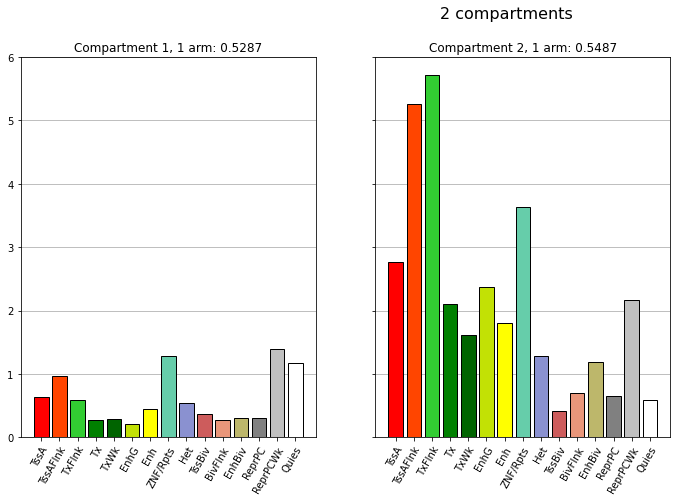

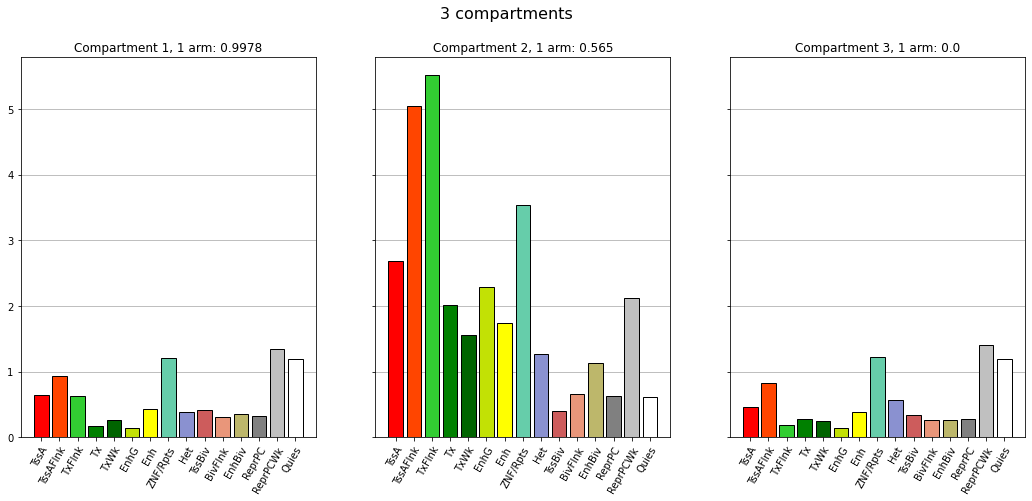

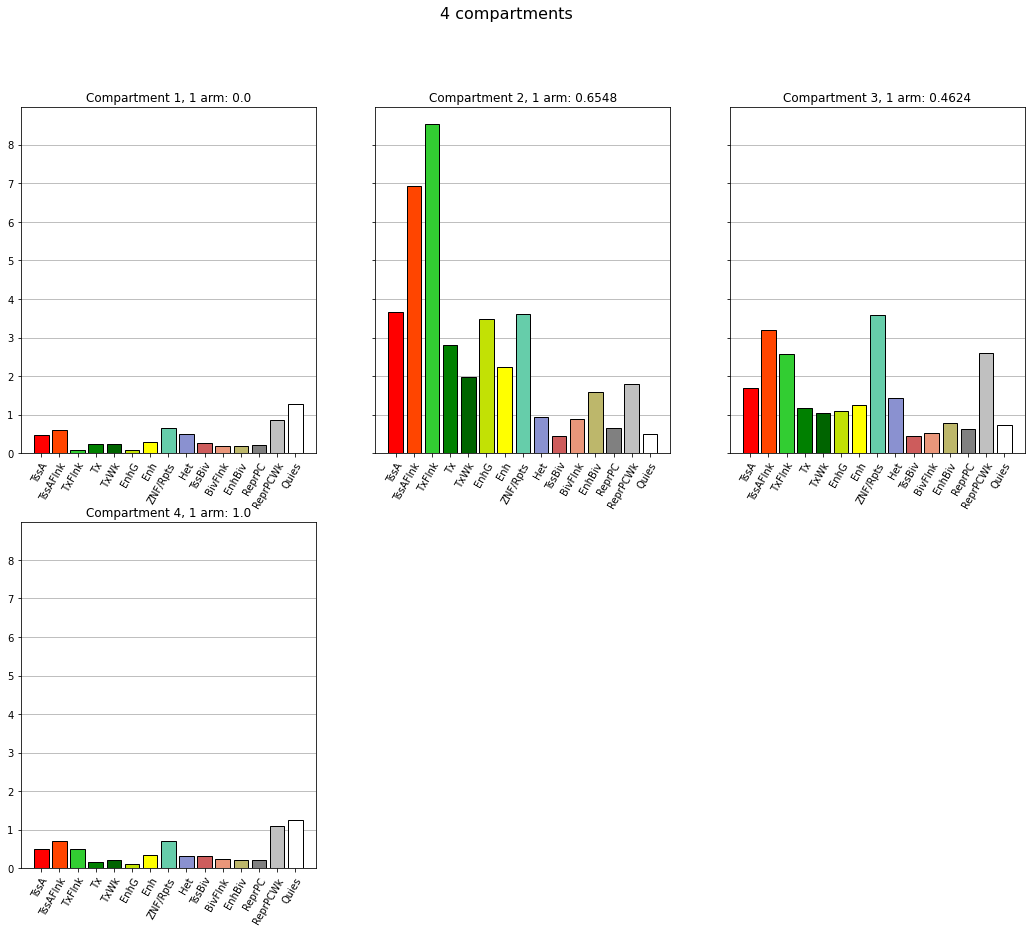

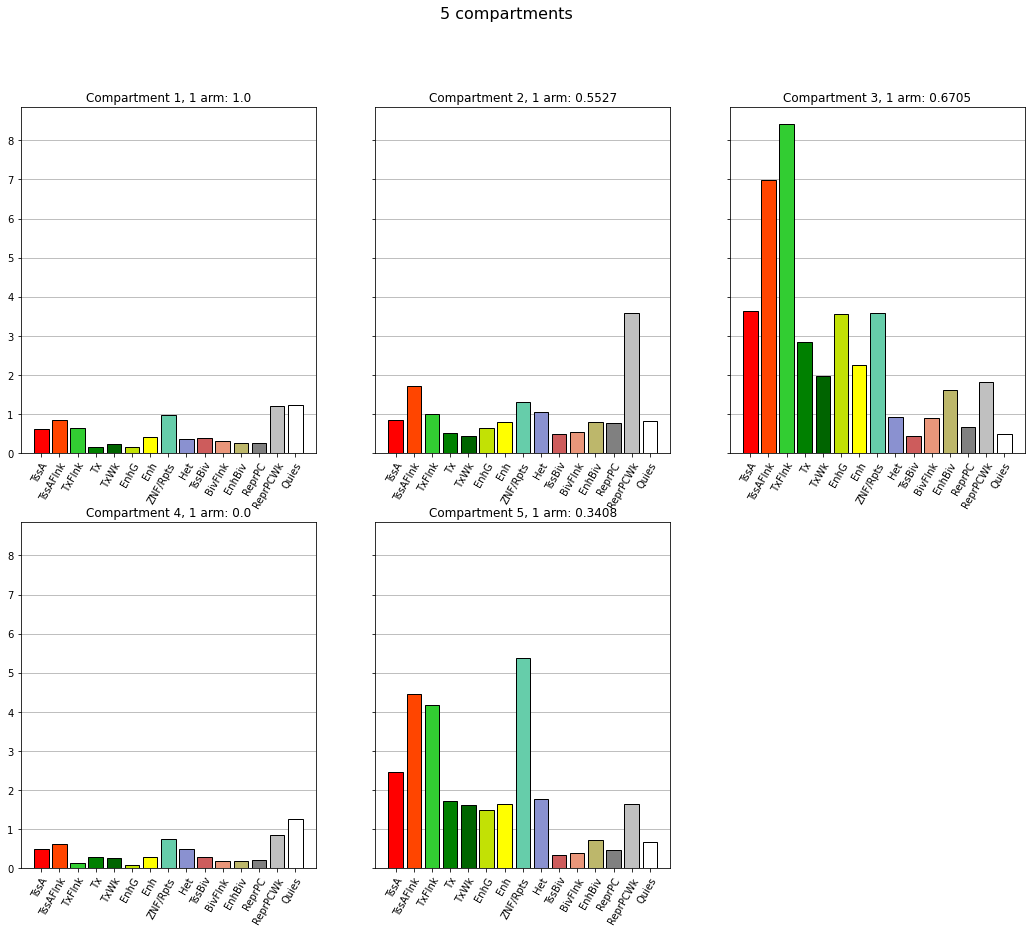

In [119]:
for c in range(2, 6):
    comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=c)[1]
    rows = int(np.ceil(c/3))
    fig, axes = plt.subplots(rows, 3, figsize=(18,rows*7), sharey=True)
    axes = axes.reshape(rows,3)
    k = 0
    for i in range(rows):
        for j in range(3):
            markers = np.mean(epi[comps==k], axis=0)/coverages
            axes[i,j].bar(range(15), markers, color=colors, edgecolor='k')
            axes[i,j].set_xticks(range(15))
            axes[i,j].set_xticklabels(labels, rotation=60, ha='right', rotation_mode='anchor')
            axes[i,j].set_axisbelow(True)
            axes[i,j].grid(True, axis='y')
            arm = sum((comps==k)[:id_centr])/sum(comps==k)
            axes[i,j].set_title('Compartment ' + str(k+1) + ', 1 arm: '+str(np.round(arm, 4)))
            k+=1
            if k==c:
                if c%3==1:
                    fig.delaxes(axes[i,1])
                    fig.delaxes(axes[i,2])
                elif c%3==2:
                    fig.delaxes(axes[i,2])
                break
    plt.suptitle(str(c) + ' compartments', size=16)
    plt.show()

In [49]:
for c in range(5, 6):
    comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=c)[1]
    all_markers = np.zeros((c, len(coverages)))
    for k in range(c):
        markers = np.mean(epi[comps==k], axis=0)/coverages
        all_markers[k] = np.array(markers)


In [63]:
dist = np.zeros((5, 5))
for i in range(4):
    for j in range(i+1, 5):
        dist[i, j] = np.sum(np.abs(all_markers[i] - all_markers[j]))
        dist[j, i] = dist[i, j]

In [64]:
dist

array([[ 0.        , 23.76182559, 22.09428437, 19.1334344 , 16.75896861],
       [23.76182559,  0.        ,  2.33780128,  9.80684928, 35.28575413],
       [22.09428437,  2.33780128,  0.        ,  8.00163196, 33.4805368 ],
       [19.1334344 ,  9.80684928,  8.00163196,  0.        , 29.50663352],
       [16.75896861, 35.28575413, 33.4805368 , 29.50663352,  0.        ]])

In [65]:
dists = []
for i in range(4):
    for j in range(i+1, 5):
        dists.append(np.sum(np.abs(all_markers[i] - all_markers[j])))
print(dists)
print(np.mean(dists))

[23.76182559390903, 22.094284371895373, 19.13343439746763, 16.75896861144732, 2.3378012796688874, 9.80684928315743, 35.28575413226692, 8.001631955689733, 33.480536804799236, 29.506633517008552]
20.016771994731016


In [70]:
dist = np.zeros((5, 5))
for i in range(4):
    for j in range(i+1, 5):
        dist[i, j] = np.max(np.abs(all_markers[i] - all_markers[j]))
        dist[j, i] = dist[i, j]
dist

array([[0.        , 4.62601349, 4.3798912 , 4.05199813, 4.24973787],
       [4.62601349, 0.        , 0.50689683, 2.72921385, 8.27658332],
       [4.3798912 , 0.50689683, 0.        , 2.37062962, 7.76968649],
       [4.05199813, 2.72921385, 2.37062962, 0.        , 7.40964709],
       [4.24973787, 8.27658332, 7.76968649, 7.40964709, 0.        ]])

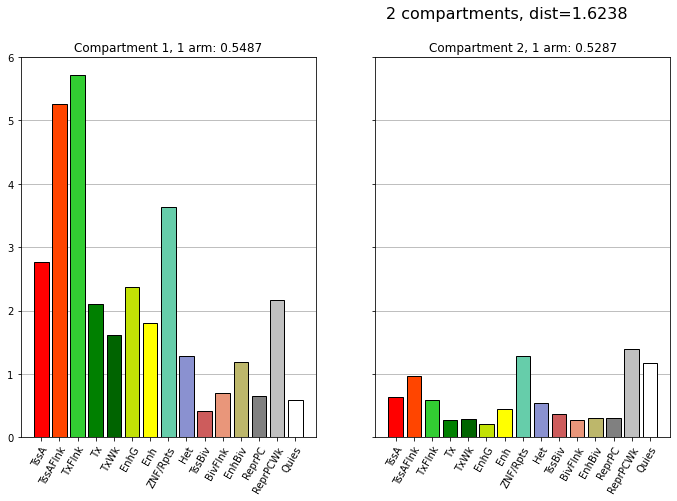

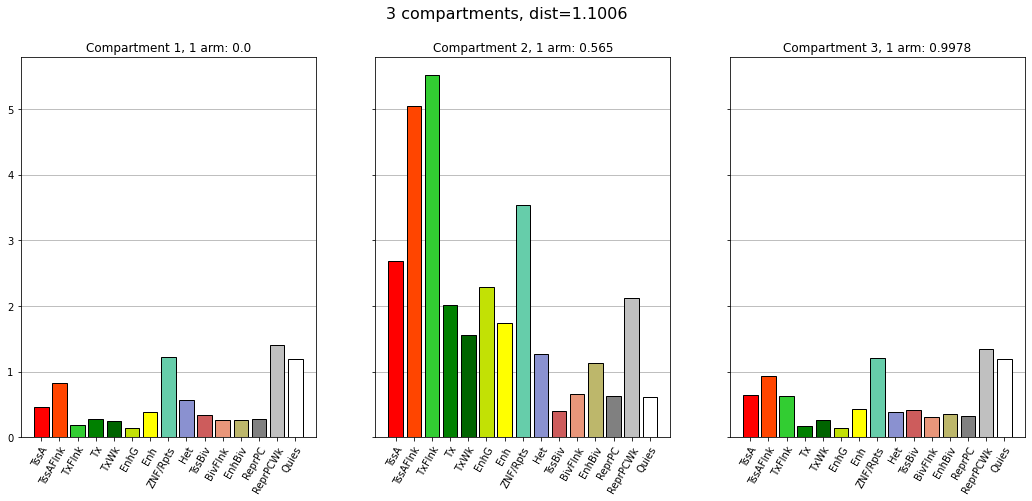

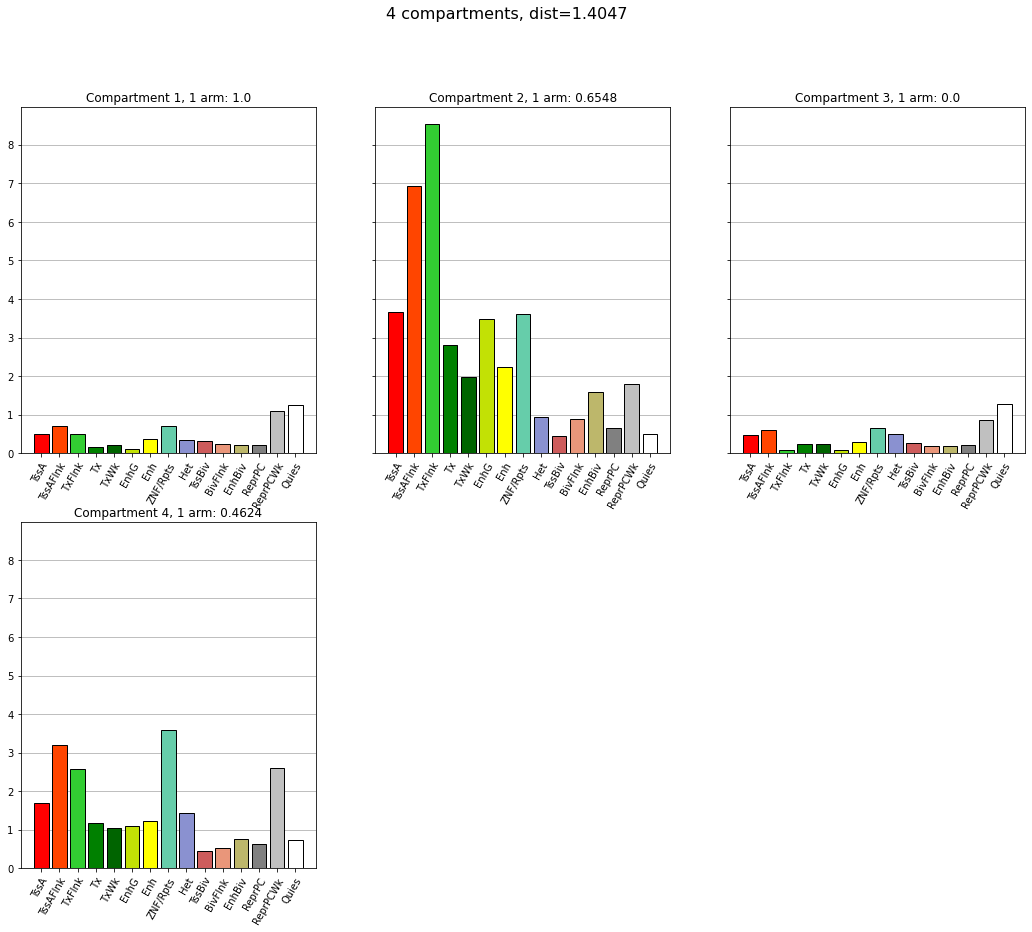

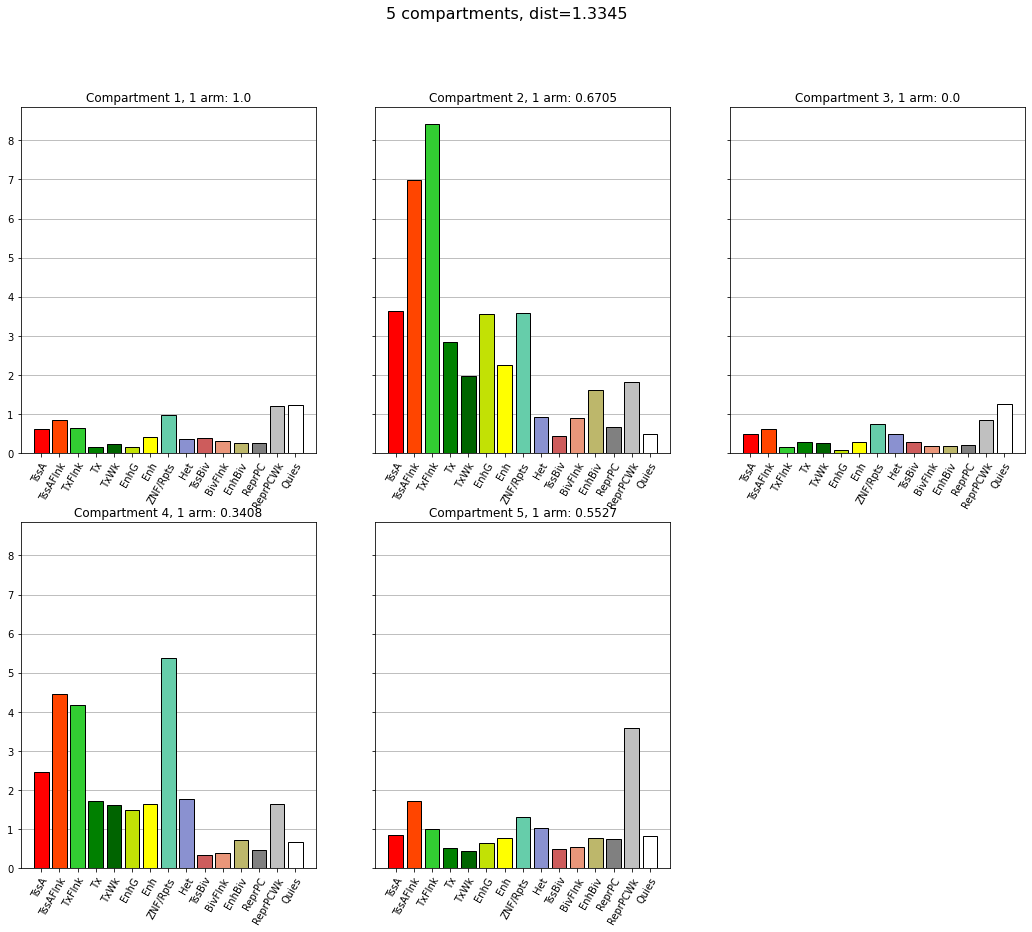

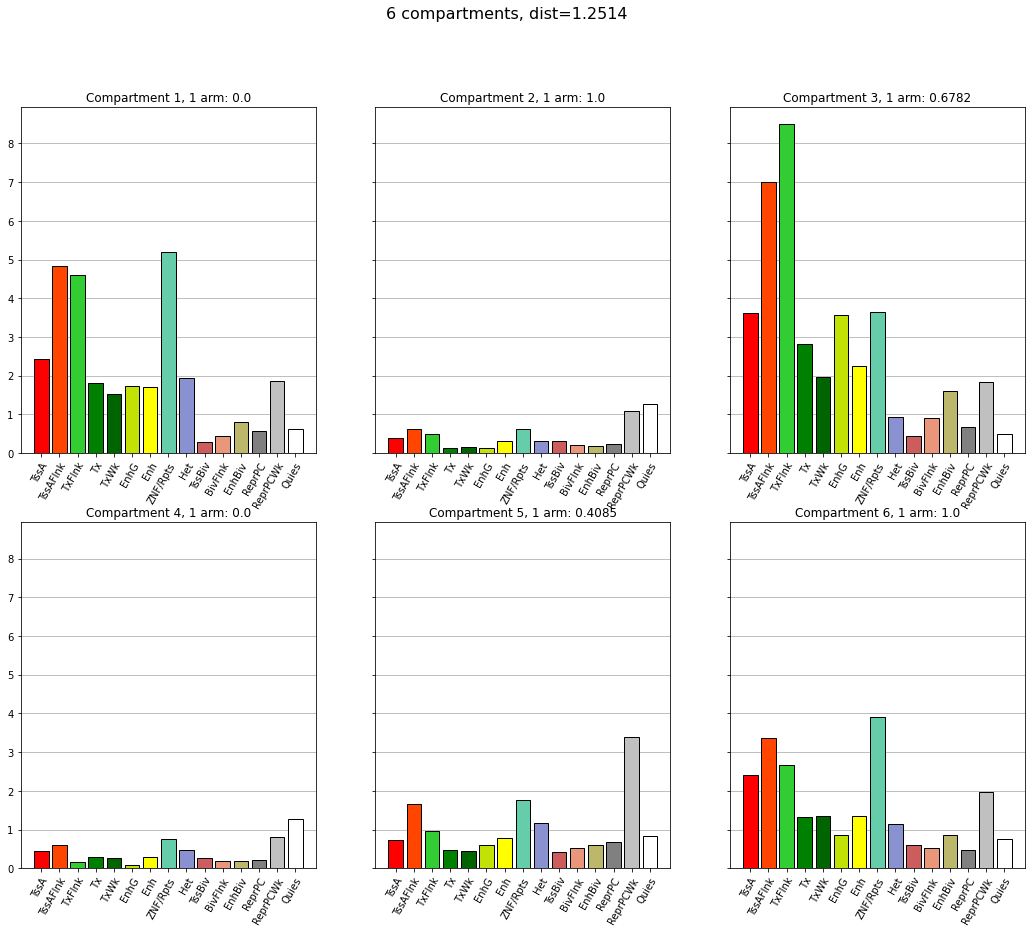

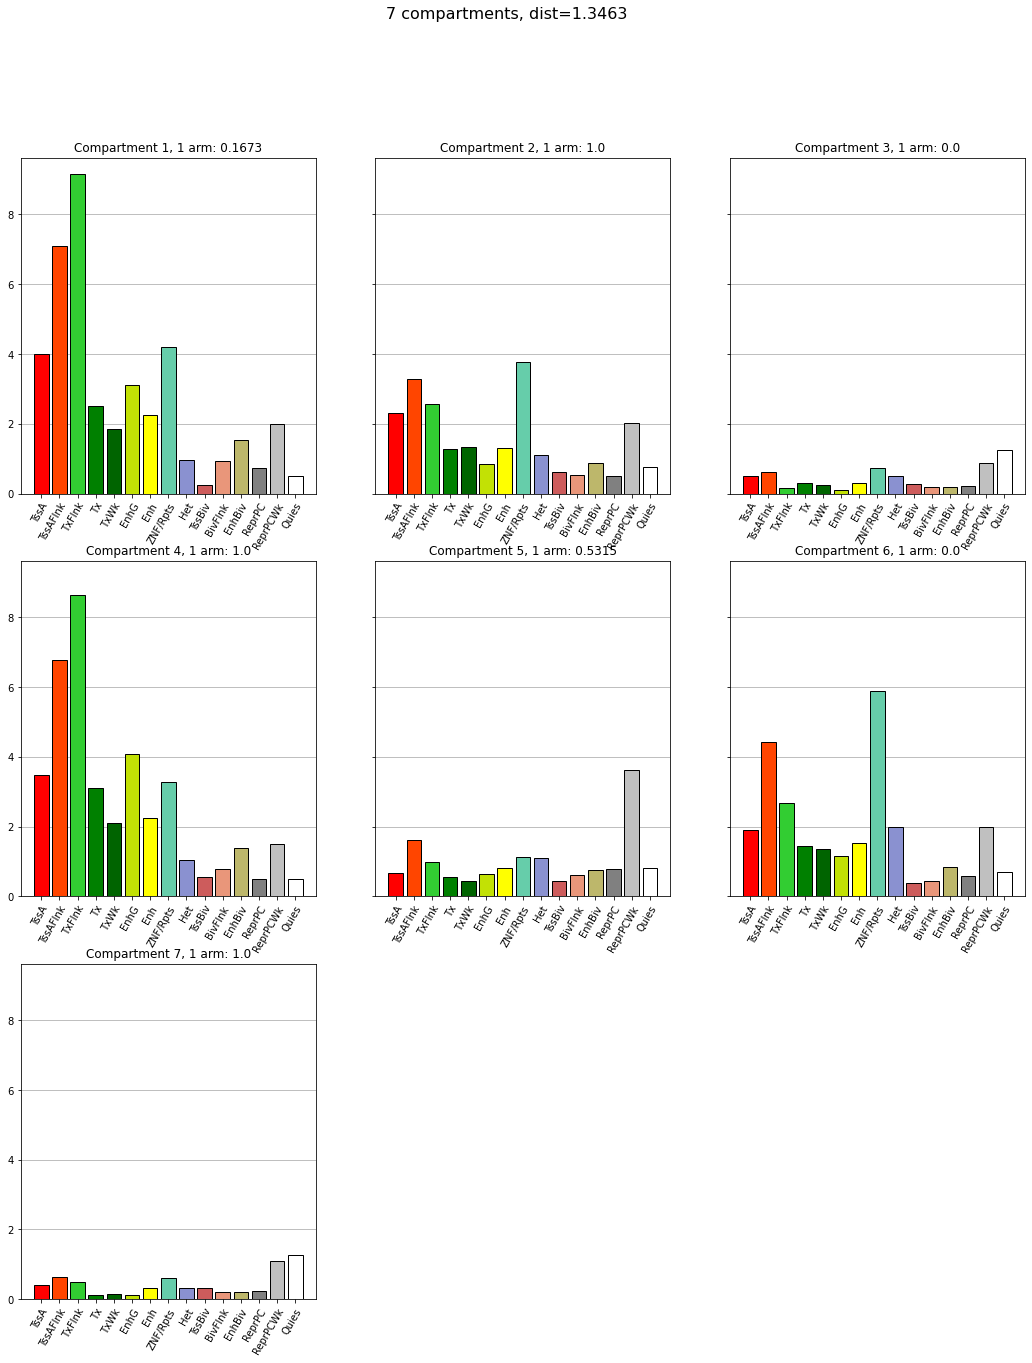

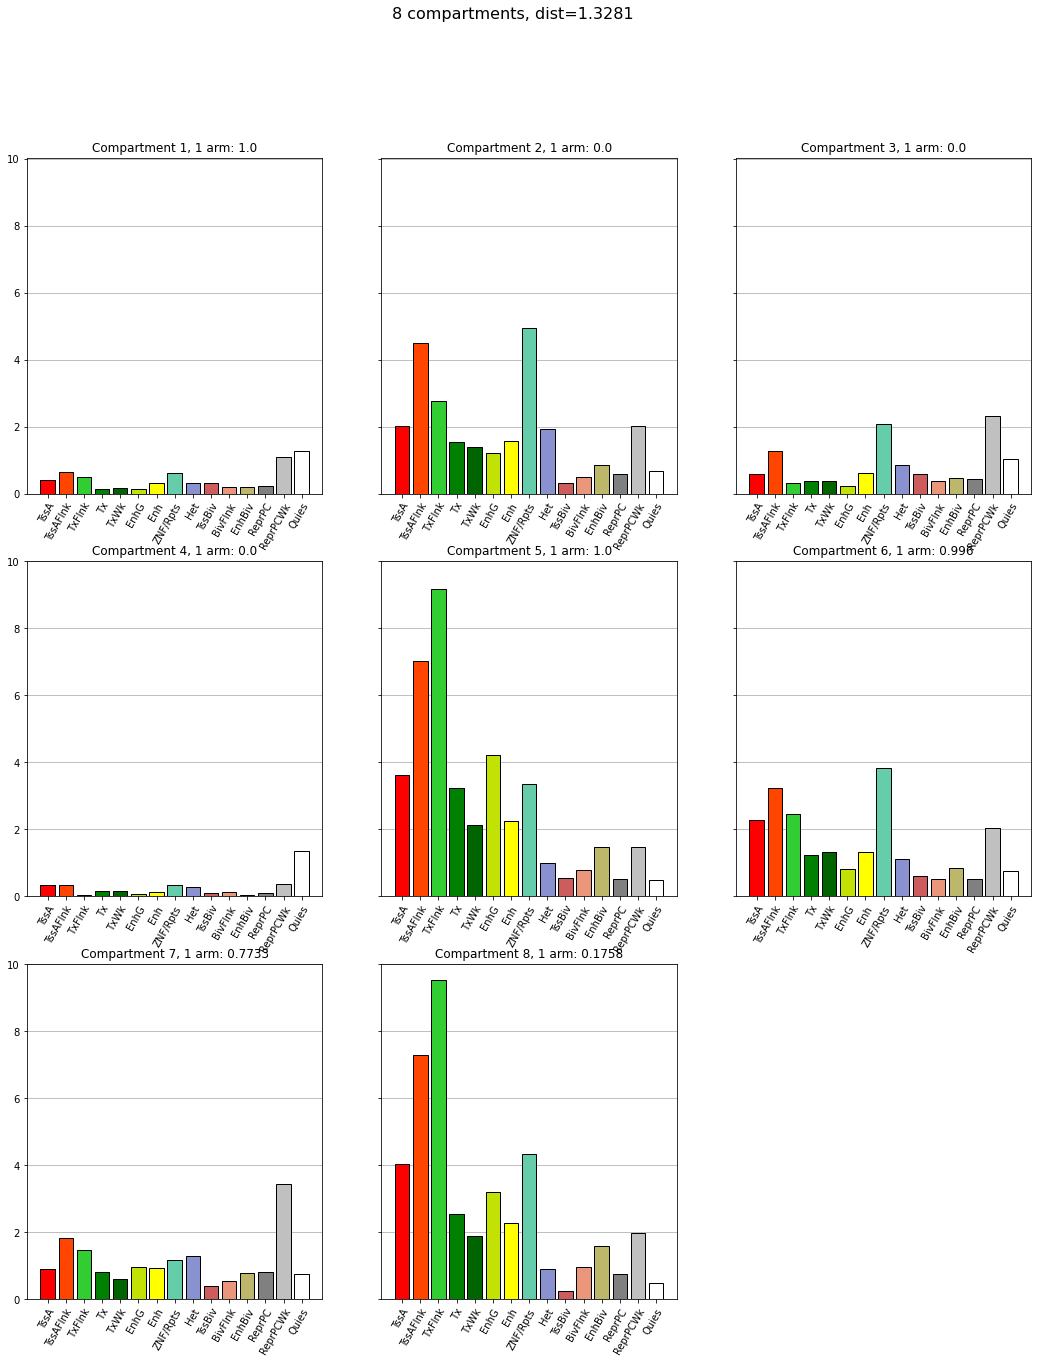

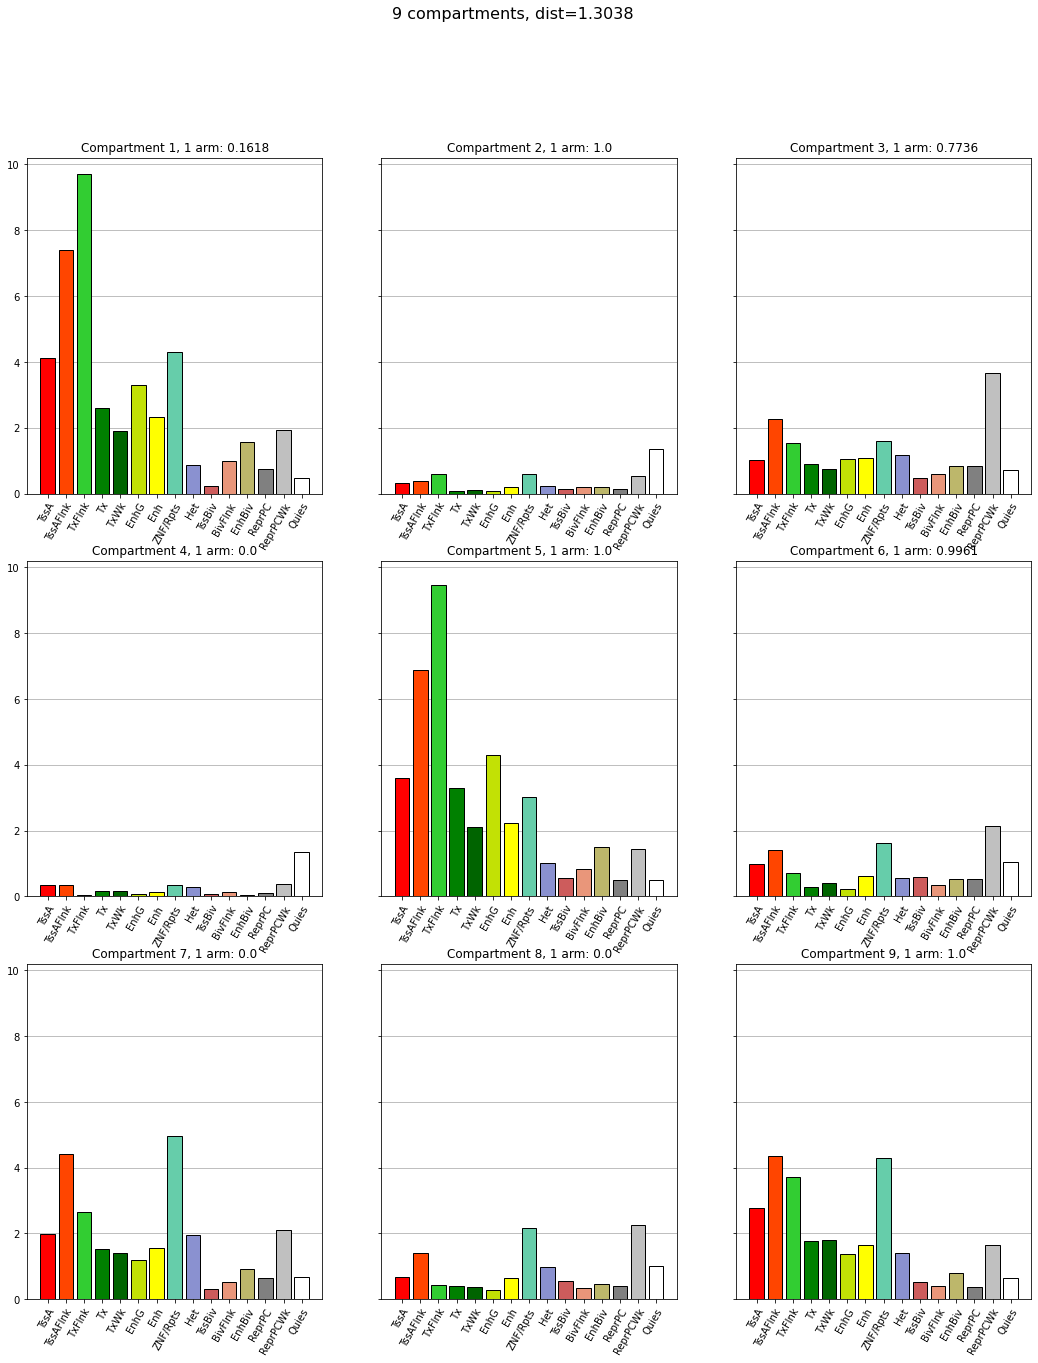

In [120]:
all_dists_mean = []
all_dists_max = []
for c in range(2, 10):
    comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=c)[1]
    rows = int(np.ceil(c/3))
    fig, axes = plt.subplots(rows, 3, figsize=(18,rows*7), sharey=True)
    axes = axes.reshape(rows,3)
    all_markers = np.zeros((c, len(coverages)))
    k = 0
    for i in range(rows):
        for j in range(3):
            markers = np.mean(epi[comps==k], axis=0)/coverages
            all_markers[k] = np.array(markers)
            axes[i,j].bar(range(15), markers, color=colors, edgecolor='k')
            axes[i,j].set_xticks(range(15))
            axes[i,j].set_xticklabels(labels, rotation=60, ha='right', rotation_mode='anchor')
            axes[i,j].set_axisbelow(True)
            axes[i,j].grid(True, axis='y')
            arm = sum((comps==k)[:id_centr])/sum(comps==k)
            axes[i,j].set_title('Compartment ' + str(k+1) + ', 1 arm: '+str(np.round(arm, 4)))
            k+=1
            if k==c:
                if c%3==1:
                    fig.delaxes(axes[i,1])
                    fig.delaxes(axes[i,2])
                elif c%3==2:
                    fig.delaxes(axes[i,2])
                break
    dists_mean = []
    dists_max = []
    for i in range(c-1):
        for j in range(i+1, c):
            dists_mean.append(np.mean(np.abs(all_markers[i] - all_markers[j])))
            dists_max.append(np.max(np.abs(all_markers[i] - all_markers[j])))
    dist_mean = np.mean(dists_mean)
    dist_max = np.mean(dists_max)
    all_dists_mean.append(dist_mean)
    all_dists_max.append(dist_max)
    plt.suptitle(str(c) + ' compartments, dist=' + str(np.round(dist_mean, 4)), size=16)
    plt.show()

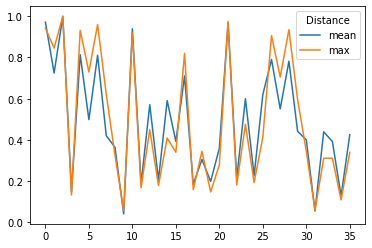

In [121]:
plt.plot(dists_mean/max(dists_mean), label='mean')
plt.plot(dists_max/max(dists_max), label='max')
plt.legend(title='Distance', loc='upper right')
plt.show()

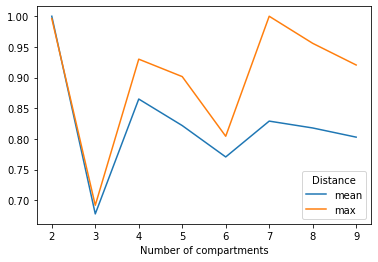

In [122]:
plt.plot(range(2, 10), all_dists_mean/max(all_dists_mean), label='mean')
plt.plot(range(2, 10), all_dists_max/max(all_dists_max), label='max')
plt.legend(title='Distance')
plt.xlabel('Number of compartments')
plt.show()

In [130]:
model, comps = hictoolbox.makecompartimentbyGaussianHMM(D, N=3)

In [141]:
model1, comps1 = hictoolbox.makecompartimentbyGaussianHMM(D[:id_centr, :id_centr], N=3)

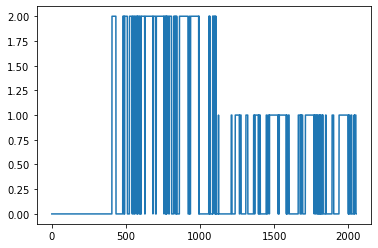

In [142]:
plt.plot(comps)
plt.show()

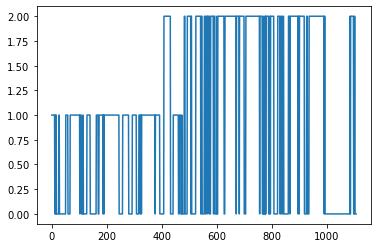

In [143]:
plt.plot(comps1)
plt.show()

In [146]:
model1.predict(D[id_centr:, id_centr:])

ValueError: operands could not be broadcast together with shapes (945,1,945) (3,1108) 

In [149]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=5)
res = pca.fit_transform(D)

res1 = pca.fit_transform(D[:id_centr, :id_centr])
res2 = pca.fit_transform(D[id_centr:, id_centr:])

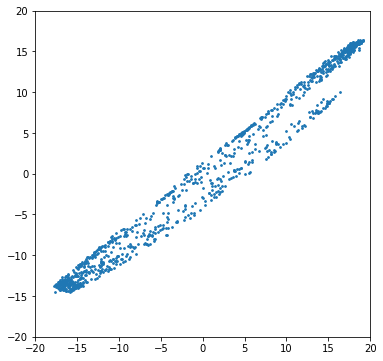

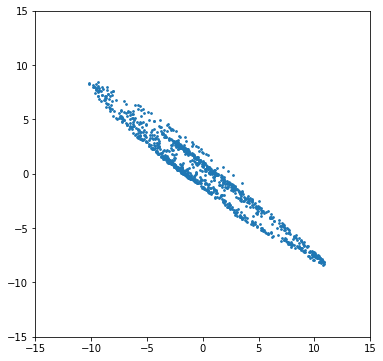

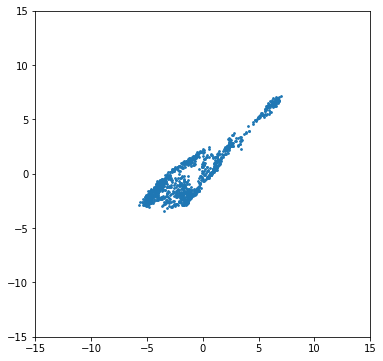

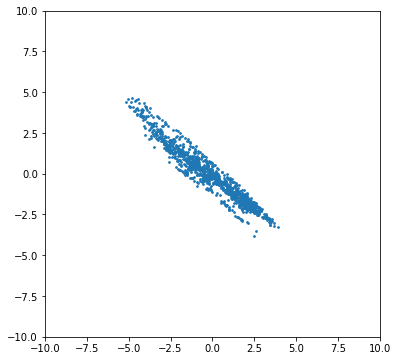

In [191]:
plt.figure(figsize=(6,6))
plt.scatter(res[:id_centr, 0], res1[:, 0], s=3)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(res[:id_centr, 2], res1[:, 1], s=3)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(res[:id_centr, 3], res1[:, 2], s=3)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(res[:id_centr, 4], res1[:, 3], s=3)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

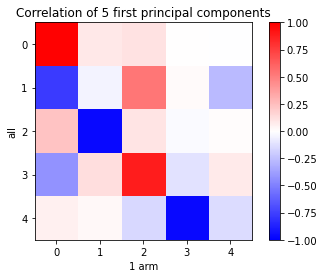

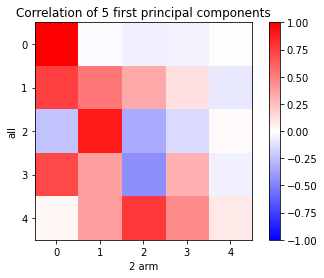

In [189]:
from scipy.stats import pearsonr

corrs = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        corrs[i, j] = pearsonr(res[:id_centr, i], res1[:, j])[0]
plt.imshow(corrs, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('1 arm')
plt.ylabel('all')
plt.title('Correlation of 5 first principal components')
plt.show()


corrs = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        corrs[i, j] = pearsonr(res[id_centr:, i], res2[:, j])[0]
plt.imshow(corrs, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('2 arm')
plt.ylabel('all')
plt.title('Correlation of 5 first principal components')
plt.show()

PCA(n_components=5)